# EDA of Loan Data with Python
## by *Osama Hamdy Osman*

## Prosper’s Story:

[**Prosper**](https://www.prosper.com/about) was founded in 2005 as the first **peer-to-peer** lending marketplace in the United States. Since then, Prosper has facilitated more than **$13 billion in loans** to more than **850,000** people.

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between \\$2,000 and \\$40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd

%matplotlib inline

## The Dataset:

The Prosper loan dataset is one of several [**dataSets Options**](https://docs.google.com/document/u/1/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True) for the Advanced Track - Data specialization Third project Powered by ITIDA and coordinated by Udacity.

In [3]:
# load in the dataset into a pandas dataframe and specifying the listingCreationDate to be of datetime data type
df = pd.read_csv('prosperLoanData.csv', parse_dates=['ListingCreationDate'])
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# high-level overview of data shape
df.shape

(113937, 81)

In [5]:
# high-level overview of data composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [13]:
# convert CreditGrade and ProsperRating (Alpha) into ordered categorical types
ordinal_var_dict = {'CreditGrade': ["AA","A","B","C","D","E","HR","NC"],
                    'ProsperRating (Alpha)': ["AA","A","B","C","D","E","HR"],
                   'LoanStatus' : ["Cancelled", "Completed","Current", "FinalPaymentInProgress", "Past Due (1-15 days)", 
                                 "Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)",
                                   "Past Due (91-120 days)", "Past Due (>120 days)","Defaulted", "Chargedoff"],
                   'IncomeRange':["$0", "Not employed","Not displayed","$1-24,999",
                                 "$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]}

for var in ordinal_var_dict:
    if ordinal_var_dict[var] == 'LoanStatus':
        ordered_var = pd.api.types.CategoricalDtype(ordered = False, categories = ordinal_var_dict[var])
    else:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of The dataset?
This data set comprises **113,937 loans** with **81 attributes** on each loan, including *loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information*.

* Before 2009 credit rating named `"CreditGrade"` “The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.


* After **July 2009**, there’s another measure `“ProsperRating (Alpha)”` The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after **July 2009**.

Both variables are imported as object datatype in the dataframe. Yet, It’s more sensible to exhibit them as ordered categorical variables, the matter that will come in handy if any modeling that involves such variables is pondered.

worth noting that the dataset was last updated 03/11/2014

### What is/are the main feature(s) of interest in The dataset?

Intrigued by the affluence of the dataset and its wide range of variables, i will explore it to glean some insights and refine my understanding of the lending market in the US. In this journey i will try to cover the following points:

* Learn about borrowers:
    > * The Distribution of the loan amounts they usually go for.
    > * Delinquency incidents and their leading factors
    > * Associations between income range, and borrowers’ credit score and defaulting on loans.
    > * Correlations between risk of a loan “estimated loss” and its revenues.
* Learn about the investors:
    > * Their count per loan
    > * The yields they garner from lending.
* Prosper performance trends “by year and by state”

**Note:** This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1608172512599000&usg=AOvVaw3pTqUqYfvigl_FWgtIlTcE) explains the variables in the data set.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* The borrowers’ geographic and demographic variables and their the debt to income ratio.
* Other features of investors like thier number per listing and their lender yield rates.

## Univariate Exploration

The first focus will be some of the attributes that belongs to the borrowers. 
The total count of borrowers in our dataset obtained by uniquly counting the `“MemberKey”` variable which is a key for each borrower. There are **90831** unique borrowers in the dataset.

In [33]:
# The total count of unique borrowers
df.MemberKey.nunique()

90831

### 1. An Overview of the Loan Original Amount Distributions

Seaborn provides a convenient interface to generate historgrams with some good number of bins that make details clearer. 

* As per the summary statistics, the mean is relatively larger than the median which indicates postive skewness. 


* The histogram for the variable shows that the most common loan amounts are \\$4,000 then \\$15,000 and \\$10,000. the values above $24,000 is very uncommon.The spikes indicates common amounts borrowers tend to borrow like those at 4k, 5k, 10k, 15k, and to lesser extent at 20k an 25k. 


* The overall range of the loans amounts didn't warrant any scale transformation as they aren't that heavily skewed and the distance between the largest and smallest values isn't that distant.

In [34]:
# Summary statistics of the loan amount
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

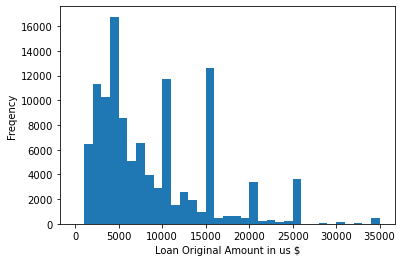

In [35]:
bins = np.arange(0, df.LoanOriginalAmount.max()+1000, 1000)
plt.hist(data=df, x='LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount in us $')
plt.ylabel('Freqency');

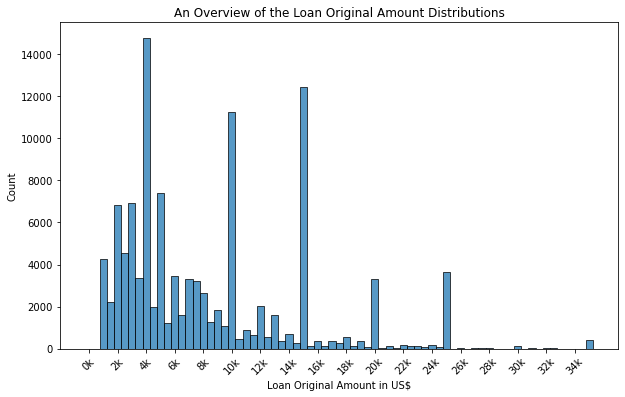

In [36]:
# Plotting a histogram for the loan amouts
plt.figure(figsize= (10, 6))
bins = np.arange(0, df.LoanOriginalAmount.max()+1000, 500)
xtick_loc = np.arange(0, df.LoanOriginalAmount.max()+1000, 2000)+250 # adjusting the tick marks at the middle of the bars
xtick_label = ['{}k'.format(int(v/1000)) for v in xtick_loc]
sb.histplot(data=df, x="LoanOriginalAmount", bins= bins)
plt.xticks(xtick_loc, xtick_label, rotation=45)
plt.xlabel('Loan Original Amount in US$')
plt.title('An Overview of the Loan Original Amount Distributions');

### 2. Credit Term:

> * The most common loan term is 36 months.

In [37]:
# The relative frequency of the different credit terms
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

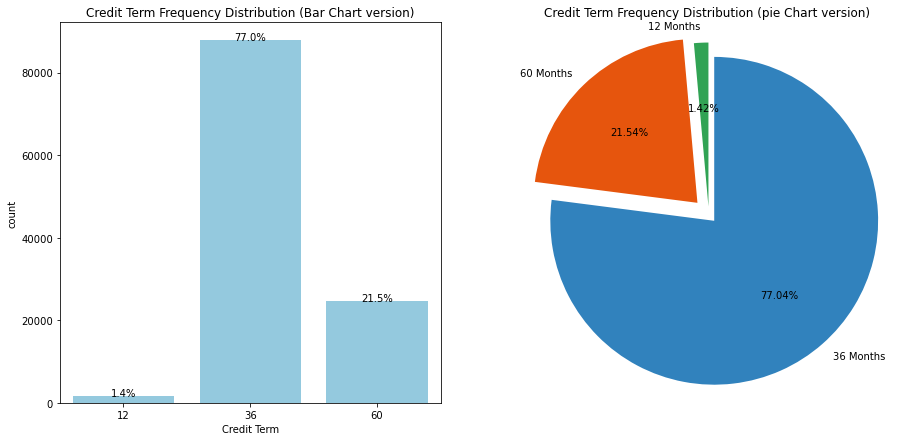

In [38]:
# The absolute counts of each term category along with the relative frequecny of each
plt.figure(figsize=(15, 7))


plt.subplot(1,2,1)
plt.title('Credit Term Frequency Distribution (Bar Chart version)')
sb.countplot(data=df, x='Term', color='Skyblue')
plt.xlabel('Credit Term');

# Getting each term's count
term_counts = df.Term.value_counts()
total_terms = df.Term.value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get text property for the label to get the corresponding count from the types count
    count= term_counts[int(label.get_text())]
    # formulate the text to be printed
    pct_string = "{:0.1f}%".format(count*100/total_terms)
    
    # place the text on the correct position
    plt.text(loc, count+3, pct_string, ha='center', color='Black')
    
    
plt.subplot(1,2,2)
# Trying out a pie chart as the number of categories is only 3 and there are stark differences between them
labels = ["{} Months".format(v) for v in term_counts.index]
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.pie(term_counts, labels =labels, startangle = 90, counterclock = False, colors=outer_colors, explode=(0.05, .1, .05), autopct='%1.2f%%')
plt.axis('image')
plt.title('Credit Term Frequency Distribution (pie Chart version)');

#### Resources
http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php#:~:text=To%20add%20percentages%20to%20each,percentage%20to%20the%20tenth%20place.

### 3. An Overview of the Credit Ratings of the Borrowers:

* One of the important variables that impact borrowers’ ability to get a loan is their credit rating. So, let's massage the distribution of this aspect. 

#### `CreditGrade` (rating scale before July 2009)

there’s some 84,984 listings in our dataset that have no `“CreditGrade”` as this kind of rating was originally assigned before 2009. So, in the following barchart, the data was confined to the listings before July, 2009.

In [39]:
# investigating the credit ratings first feature "CreditGrade"
df.CreditGrade.value_counts(dropna=False)

NaN    84984
C       5649
D       5153
B       4389
AA      3509
HR      3508
A       3315
E       3289
NC       141
Name: CreditGrade, dtype: int64

In [40]:
# Getting the records for loans before july 2009
df_early = df.loc[df.ListingCreationDate <= "June - 2009"]
df_early[['ListingKey', 'CreditGrade', 'Term']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29084 entries, 0 to 113927
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ListingKey   29084 non-null  object  
 1   CreditGrade  28953 non-null  category
 2   Term         29084 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 710.4+ KB


In [41]:
# investigating the credit ratings first feature "CreditGrade" for data before July 2009
df_early.CreditGrade.value_counts(dropna=False)

C      5649
D      5153
B      4389
AA     3509
HR     3508
A      3315
E      3289
NC      141
NaN     131
Name: CreditGrade, dtype: int64

As per the result of `value_counts` above, there were a total of 29084 records before july, 2009 from whome only 131 records has no retings. We can investigate on this deeper

In [42]:
# subsetting the loans with no credit ratings in the early loans before July 2009
df_early[df_early.CreditGrade.isnull()].sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
79597,A57034194938664808FFB36,328788,2008-05-08 12:16:06.137,NaN,36,Completed,2010-02-05 00:00:00,0.20210,0.1800,0.1700,...,-9.41,0.0,0.0,0.0,0.0,1.0,0,0,0.0,167
41579,F2D53418616960612F3EA34,313062,2008-04-17 17:06:22.687,NaN,36,Completed,2013-01-11 00:00:00,0.17069,0.1490,0.1390,...,-176.23,0.0,0.0,0.0,0.0,1.0,0,0,0.0,227
83181,1E423431266446631AE7115,401550,2008-09-20 16:44:06.257,NaN,36,Completed,2010-08-25 00:00:00,0.11448,0.0935,0.0835,...,-21.36,0.0,0.0,0.0,0.0,1.0,0,1,5140.0,10
22838,76003410006942648B167B6,259904,2008-01-04 08:51:03.217,NaN,36,Completed,2012-11-20 00:00:00,0.33393,0.3100,0.3000,...,-52.93,0.0,0.0,0.0,0.0,1.0,0,0,0.0,93
69931,3B1D3404479115730654CED,226235,2007-11-05 09:31:59.820,NaN,36,Completed,2013-02-09 00:00:00,0.24153,0.2100,0.2000,...,-20.28,0.0,0.0,0.0,0.0,1.0,0,0,0.0,75


In [43]:
# the prevailing term of those entries
df_early[df_early.CreditGrade.isnull()].Term.value_counts()

36    130
12      1
Name: Term, dtype: int64

In [44]:
# the loan amounts of The entries before 2009
total_per_loans = df_early.LoanOriginalAmount.sum() # total period's loans amount
print(total_per_loans)
df_early.LoanOriginalAmount.describe()

179137169


count    29084.000000
mean      6159.303019
std       5577.202866
min       1000.000000
25%       2500.000000
50%       4500.000000
75%       7903.750000
max      25000.000000
Name: LoanOriginalAmount, dtype: float64

In [45]:
# the loan amounts of the entries with missing credit ratings
loan_wg = df_early[df_early.CreditGrade.isnull()].LoanOriginalAmount.sum() # loans without credit ratings
print(loan_wg)
df_early[df_early.CreditGrade.isnull()].LoanOriginalAmount.describe()

548547


count      131.000000
mean      4187.381679
std       3180.337886
min       1000.000000
25%       2000.000000
50%       3000.000000
75%       5000.000000
max      15000.000000
Name: LoanOriginalAmount, dtype: float64

In [46]:
# % of money that was granted for loans missing the credit ratings
loan_wg / total_per_loans

0.0030621618230441054

In [47]:
# How many loans from those without ratings were not completed
(df_early[df_early.CreditGrade.isnull()].LoanStatus != "Completed").sum()

9

* That's really interesting, only 9 loans were not completed.

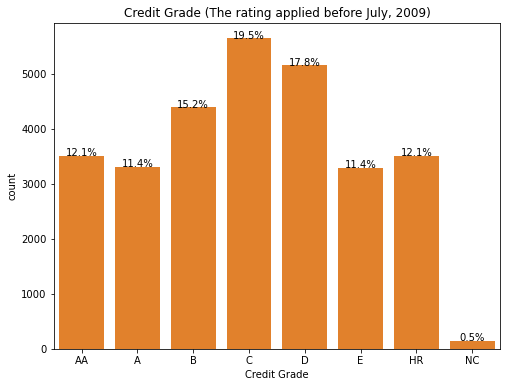

In [48]:
# Exploring the counts of the borrowers cerdit ratings along with the relative frequecny of each
plt.figure(figsize=(8, 6)) # adapting a larger figure size of clearer plotting

base_color = sb.color_palette()[1]
sb.countplot(data=df_early, x='CreditGrade', color=base_color);

# Getting each term's count
ratings_count = df_early.CreditGrade.value_counts()
total_ratings = ratings_count.sum()

# get the current tick locations and labels
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get text property for the label to get the corresponding count from the types count
    count= ratings_count[label.get_text()]
    # formulate the text to be printed
    pct_string = "{:0.1f}%".format(count*100/total_ratings)
    
    # place the text on the correct position
    plt.text(loc, count+4, pct_string, ha='center', color='Black')
    
plt.xlabel('Credit Grade')    
plt.title('Credit Grade (The rating applied before July, 2009)');

#### `ProsperRating (Alpha)` "Credit Rating scale employed after July 2009”:

**`ProsperRating (Alpha)`**; the Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009. This variable was of datatype object and converted to an ordered categorical variable for the sake of analysis simplification.

In [49]:
# Getting the records for loans from july 2009 onward 
df_later = df.loc[df.ListingCreationDate >'2009-06-30']
df_later[['ListingKey', 'ProsperRating (Alpha)', 'Term']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ListingKey             84853 non-null  object  
 1   ProsperRating (Alpha)  84853 non-null  category
 2   Term                   84853 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 2.0+ MB


In [50]:
df_later['ProsperRating (Alpha)'].value_counts(dropna=False)

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

No missing values for the credit ratings at all for this period. 

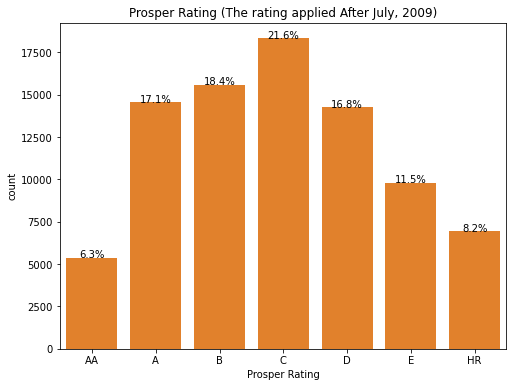

In [53]:
# Exploring the counts of the borrowers cerdit ratings along with the relative frequecny of each
plt.figure(figsize=(8, 6)) # adapting a larger figure size of clearer plotting

base_color = sb.color_palette()[1]
sb.countplot(data=df_later, x='ProsperRating (Alpha)', color=base_color);

# Getting each term's count
ratings_count = df_later['ProsperRating (Alpha)'].value_counts()
total_ratings = ratings_count.sum()

# get the current tick locations and labels
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get text property for the label to get the corresponding count from the types count
    count= ratings_count[label.get_text()]
    # formulate the text to be printed
    pct_string = "{:0.1f}%".format(count*100/total_ratings)
    
    # place the text on the correct position
    plt.text(loc, count+4, pct_string, ha='center', color='Black')
    
plt.xlabel('Prosper Rating')    
plt.title('Prosper Rating (The rating applied After July, 2009)');

### 4. Borrower states:

Investigating the borrowers' states. 
* Firstly, examining how many incidents in our dataset of no reported state? Only 5515 which is less than 5% of the total listings.

* I thought of plotting the data on a map using the geopandas library.

In [54]:
df.BorrowerState.isnull().sum()

5515

In [55]:
df.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [59]:
# getting the required files to setup the dataframes for plotting on a map through the .shp file for the united states
states = gpd.read_file('us/usa-states-census-2014.shp')
states.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."


In [60]:
# Calculate the number of loans issued by state
loans_count = df.groupby('BorrowerState').size().sort_values(ascending=False)
loans_count_df = loans_count.to_frame().reset_index()
loans_count_df.columns =  ['State', 'Loans_count']
loans_count_df.head()

,State,Loans_count
0,CA,14717
1,TX,6842
2,NY,6729
3,FL,6720
4,IL,5921


In [61]:
# merge the loans count per state with the geodataframe 'states'
loans_count_st = pd.merge(states, loans_count_df, left_on='STUSPS', right_on='State', how='right')
loans_count_st.shape

(60, 13)

In [62]:
# Check the type of the geodataframe to make sure of its type
type(loans_count_st)

geopandas.geodataframe.GeoDataFrame

In [63]:
# Examining duplicates 
loans_count_st[loans_count_st.duplicated()].head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,State,Loans_count
3,36,01779796,0400000US36,36,NY,New York,00,1.220546e+11,1.924205e+10,Northeast,"MULTIPOLYGON Z (((-72.01893 41.27411 0.00000, ...",NY,6729
11,34,01779795,0400000US34,34,NJ,New Jersey,00,1.904877e+10,3.542753e+09,Northeast,"POLYGON Z ((-75.55945 39.62981 0.00000, -75.53...",NJ,3097


In [64]:
# Check some duplicate entries 
loans_count_st[loans_count_st.State == 'NH']

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,State,Loans_count
41,33,01779794,0400000US33,33,NH,New Hampshire,00,2.318796e+10,1.026252e+09,Northeast,"POLYGON Z ((-72.55611 42.86625 0.00000, -72.53...",NH,551
42,33,01779794,0400000US33,33,NH,New Hampshire,00,2.318796e+10,1.026252e+09,Northeast,"POLYGON Z ((-72.55611 42.86625 0.00000, -72.53...",NH,551


In [65]:
# Dropping the duplicates
loans_count_st.drop_duplicates(inplace=True)

In [66]:
# there is a difference in the number of states
loans_count_st.shape

(51, 13)

In [67]:
# check if there are states that are missing
for st in df.BorrowerState.unique():
    if st not in loans_count_st.State.unique():
        print(st)

nan


Finally,creating a map for the different states with their grade of color determining the highest in listings count. To creat this map, i have resorted to right-joining a newly created dataframe for the listings count for each state (adapted from the original dataframe) with the [“states” dataset](https://catalog.data.gov/dataset/2014-cartographic-boundary-file-urban-area-for-united-states-1-500000). The new augmented dataset (in the form of geodataframe) named `loans_count_st`.

#### Option 1

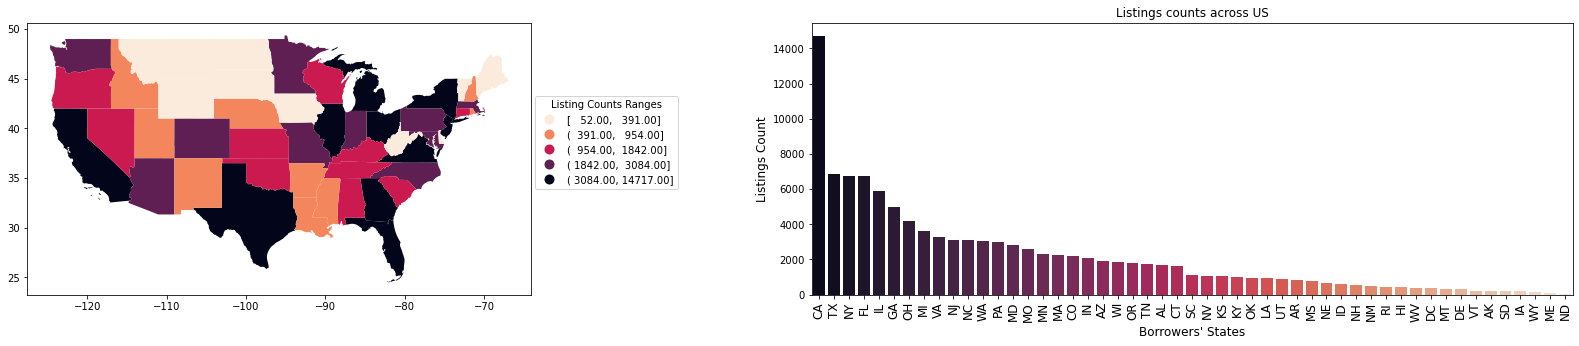

In [70]:
# create the countplot in addition to a map
# Getting the states order according to the count of loans issued
loans_ct_st = df.BorrowerState.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(30,5))

loans_count_st.plot(column='Loans_count', ax=ax[0], legend=True, cmap='rocket_r', scheme='quantiles');
leg = ax[0].get_legend()
leg.set_bbox_to_anchor((1.05, .5, 0.25, 0.25))
leg.set_title('Listing Counts Ranges')

sb.countplot(data=df, x='BorrowerState', ax=ax[1], order=loans_ct_st.index, palette='rocket')
plt.sca(ax[1])
plt.xticks(rotation=90, fontsize='large')
plt.xlabel("Borrowers' States", fontsize='large')
plt.ylabel("Listings Count", fontsize='large')
plt.title('Listings counts across US');

#### Resources:
[Setting the legend](https://stackoverflow.com/questions/39816790/relocating-legend-from-geopandas-plot)

#### Option 2

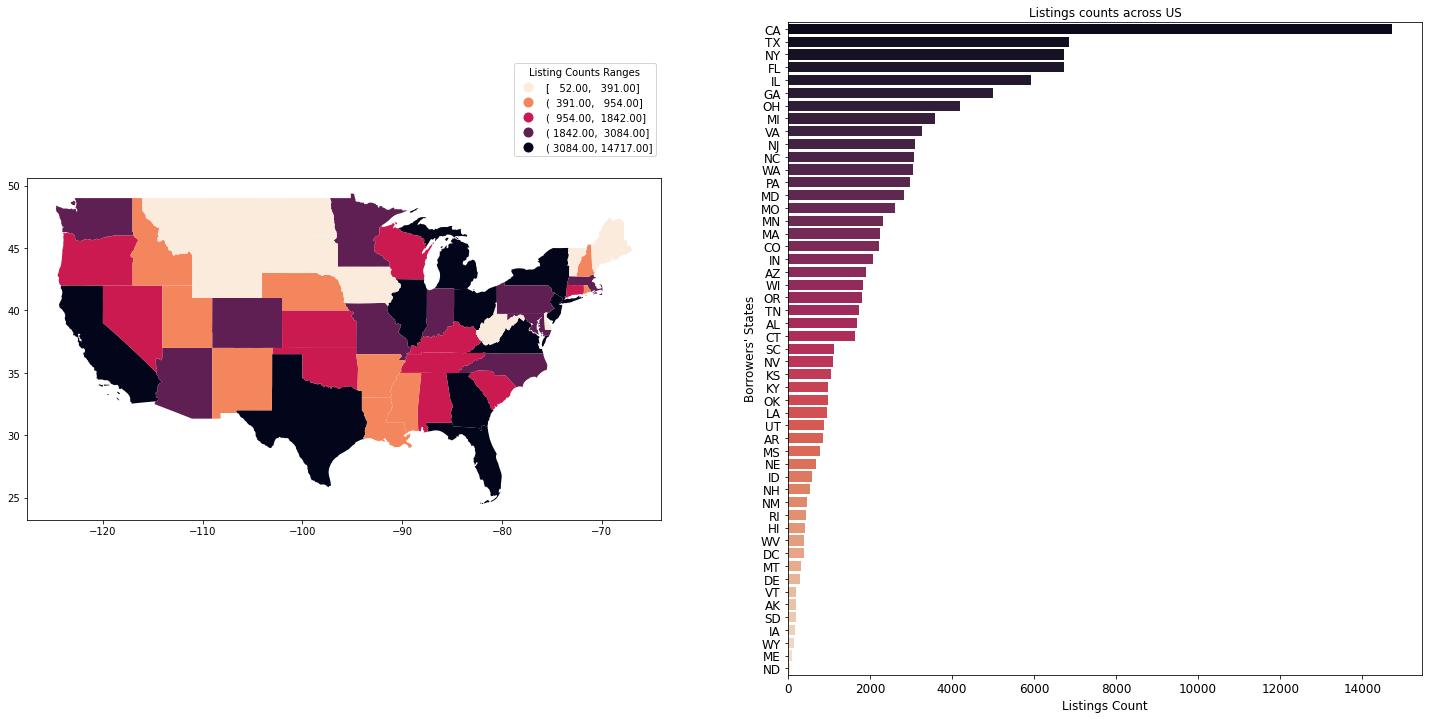

In [71]:
loans_ct_st = df.BorrowerState.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(1, 2, figsize=(25,12))

loans_count_st.plot(column='Loans_count', ax=ax[0], scheme='quantiles',legend=True, cmap='rocket_r');

leg = ax[0].get_legend()
leg.set_bbox_to_anchor((0.80, 1.15, 0.2, 0.2))
leg.set_title('Listing Counts Ranges')


sb.countplot(data=df, y='BorrowerState', ax=ax[1], order=loans_ct_st.index, palette='rocket')
plt.sca(ax[1])
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.ylabel("Borrowers' States", fontsize='large')
plt.xlabel("Listings Count", fontsize='large')
plt.title('Listings counts across US');

#### resources
* [Figure size adjusting](https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots)

### 5. Investigating Loan Status:

The current status of the loan; it was of object type, yet converting it into a categorical variable would be more prudent as it actually expresses categories of loan status. Plotting this variable as a barchart shows that the current and completed statuses are the dominant categories comprising together 94,650 loan listings or 83% of total listings

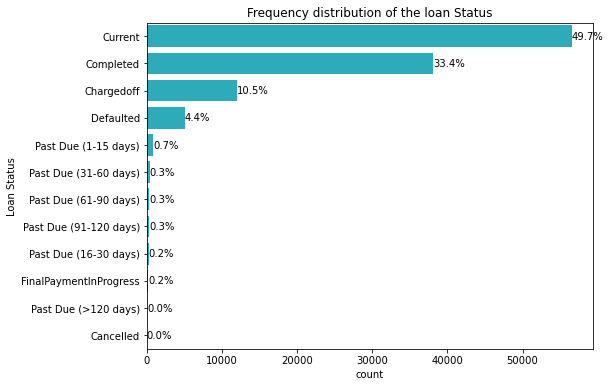

In [72]:
# Get the count of each loans status
status_counts = df.LoanStatus.value_counts()
total_count = status_counts.sum()

# bar plot for loan status 
plt.figure(figsize=(8,6))
sb.countplot(data=df, y='LoanStatus', color=sb.color_palette()[9], order=status_counts.index);
# displaying the text in front of each bar
for i in range(status_counts.shape[0]):
    count = status_counts[i]
    pct_string = "{:0.1f}%".format(count*100/total_count)
    plt.text(count+1, i, pct_string, va = "center")
    
plt.ylabel('Loan Status')
plt.title('Frequency distribution of the loan Status');

Meanwhile, the summation of the chargedoff (10.5%), defaulted (4.4%), and the past due (1.7%) categories represents around 16.6% of the total listings.
Due to the importance of the delinquency incidents in indicating the risk of the loans and the credit ratings of borrowers, a deeper look into this variable is crucial for refining the loan market understanding.

> * **Firstly**, let's distinguish between delinquent and defaulted borrowers;
[Delinquency and default]("https://www.investopedia.com/ask/answers/062315/what-are-differences-between-delinquency-and-default.asp") are both loan terms representing **different degrees** of the same problem: **missing payments**. 
A loan becomes **delinquent** when you make payments late (even by one day) or miss a regular installment payment or payments. A loan goes into **default** - which is the eventual **consequence of extended delinquency** - when the borrower fails to keep up with ongoing loan obligations or doesn't repay the loan according to the terms laid out in the promissory note agreement (such as making insufficient payments). Loan default is much more serious, changing the nature of your borrowing relationship with the lender, and with other potential lenders as well.

#### Resources
Read more: Difference between delinquency and default | [Investopedia]("https://www.investopedia.com/ask/answers/062315/what-are-differences-between-delinquency-and-default.asp#ixzz5X9ZdfES0"") 

> * **Secondly**, What is a **'Charge-Off'**
A charge-off is a debt, for example on a credit card, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time. However, a charge-off does not mean a write-off of the debt entirely. 

Read more: Charge-Off | [Investopedia]("https://www.investopedia.com/terms/c/chargeoff.asp#ixzz5X9agfYWM") 

As per those definitions the **severity of consequences** of either the **defaulted** and the **chargedoff** loans are clearly more detrimental than that of **delinquency**.

Based on the mutually exclusive categories of the loan status variable, defining a new variable for the severity of delinquency of a loan would facilitate the analysis and grouping of other variables conditional on this new variable with less categories than that of "LoanStatus" to be more manageable.

**Delinquency** variable is a new variable that buckets all `"Past Dues"` as `"Delinquent"`, and keeps `"Defaulted"`, `"Chargedoff"`,and `"Cancelled"`, while sets the others as `"Good Standing"`

In [73]:
# craft a function to do the required new mapping for the delinquency column
def delinquency(row):
    if row['LoanStatus'] in ["Defaulted", 'Chargedoff', 'Cancelled']:
        return row['LoanStatus']
    if row['LoanStatus'].startswith('Past Due'):
        return "Delinquent"
    if row['LoanStatus'] in ["Completed", "Current", "FinalPaymentInProgress"]:
        return "Good Standing"

df['delinquency'] = df.apply (lambda row: delinquency(row), axis=1)

In [74]:
# Test with sample method
df[['LoanStatus', 'delinquency']].sample(5)

,LoanStatus,delinquency
36239,Current,Good Standing
10342,Current,Good Standing
80810,Completed,Good Standing
30507,Current,Good Standing
29346,Current,Good Standing


In [75]:
# set the delinquency variable as a categorical variable
df['delinquency'] = df.delinquency.astype('category')
df.delinquency.unique()

['Good Standing', 'Delinquent', 'Defaulted', 'Chargedoff', 'Cancelled']
Categories (5, object): ['Good Standing', 'Delinquent', 'Defaulted', 'Chargedoff', 'Cancelled']

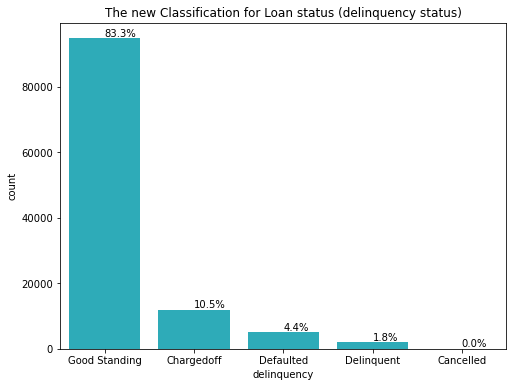

In [76]:
# Plotting the new variable 
# Get the count of each loans status
del_counts = df.delinquency.value_counts()
total_count = del_counts.sum()

# bar plot for loan status 
plt.figure(figsize=(8,6))
sb.countplot(data=df, x='delinquency', color=sb.color_palette()[9], order=del_counts.index);
# displaying the text in front of each bar
for i in range(del_counts.shape[0]):
    count = del_counts[i]
    pct_string = "{:0.1f}%".format(count*100/total_count)
    plt.text( i, count+1500, pct_string, va = "center")
    
plt.title("The new Classification for Loan status (delinquency status)");

The `"Cancelled"` Category needs to be examined to make a dicision over whether to keep its records or whittle them down

In [77]:
# an overall of five records
df[df.delinquency == 'Cancelled']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,delinquency
332,093D3365430569291709120,8912,2006-04-26 22:23:10.147,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,6,Cancelled
59998,F77F33664545520971829DC,7646,2006-04-25 07:59:15.203,C,36,Cancelled,2006-05-31 00:00:00,0.14659,0.1395,0.1345,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,62,Cancelled
72480,09E1336627538645259AE42,908,2006-02-28 08:18:58.527,HR,36,Cancelled,2006-03-29 00:00:00,0.20735,0.2000,0.1950,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23,Cancelled
97281,29453366240667435235AEE,11364,2006-05-05 03:16:59.510,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,7,Cancelled
112975,E77E34330098056070F5C30,410006,2008-10-07 17:09:34.653,A,36,Cancelled,2008-10-16 00:00:00,0.16219,0.1075,0.0975,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,25,Cancelled


In [78]:
# sums up to only $8500 in amount
df[df.delinquency == 'Cancelled'].LoanOriginalAmount.sum()

8500

 Based on the figures above, the cancelled records comprise only 5 records with only //$ 8500 in loan amount. So, i will drop those rows and this group as a whole

In [79]:
df.drop(df[df.delinquency == 'Cancelled'].index, inplace = True)

In [80]:
# test the succussful drop
df[df.delinquency == 'Cancelled']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,delinquency


In [81]:
# craft a function to do the required new mapping for the delinquency column
def delinquency(row):
    if row['LoanStatus'] in ["Defaulted", 'Chargedoff']:
        return row['LoanStatus']
    if row['LoanStatus'].startswith('Past Due'):
        return "Delinquent"
    if row['LoanStatus'] in ["Completed", "Current", "FinalPaymentInProgress"]:
        return "Good Standing"

df['delinquency'] = df.apply (lambda row: delinquency(row), axis=1)

In [82]:
# set the delinquency variable as a categorical variable
df['delinquency'] = df.delinquency.astype('category')
df.delinquency.unique()

['Good Standing', 'Delinquent', 'Defaulted', 'Chargedoff']
Categories (4, object): ['Good Standing', 'Delinquent', 'Defaulted', 'Chargedoff']

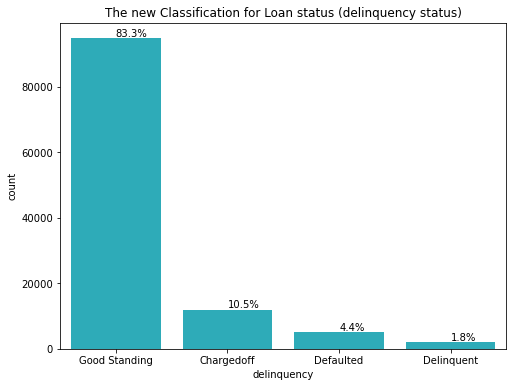

In [85]:
# Plotting the new variable 
# Get the count of each loans status
del_counts = df.delinquency.value_counts()
total_count = del_counts.sum()

# bar plot for loan status 
plt.figure(figsize=(8,6))
sb.countplot(data=df, x='delinquency', color=sb.color_palette()[9], order=del_counts.index);
# displaying the text in front of each bar
for i in range(del_counts.shape[0]):
    count = del_counts[i]
    pct_string = "{:0.1f}%".format(count*100/total_count)
    plt.text( i, count+1500, pct_string, va = "center")
    
plt.title("The new Classification for Loan status (delinquency status)");

### 6. Rates of borrowing:

The "BorrowerAPR" and the "BorrowerRate" are two nuemrical variables the measures the **The Borrower's Annual Percentage Rate (APR)** for the loan and **The Borrower's interest rate** for this loan respectively. 

To distinguish between them refer to [Interest rate vs. APR](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp); in brief the "BorrowerAPR" is more holistic as it includes not only the interest expense on the loan but also all fees and other costs involved in procuring the loan.

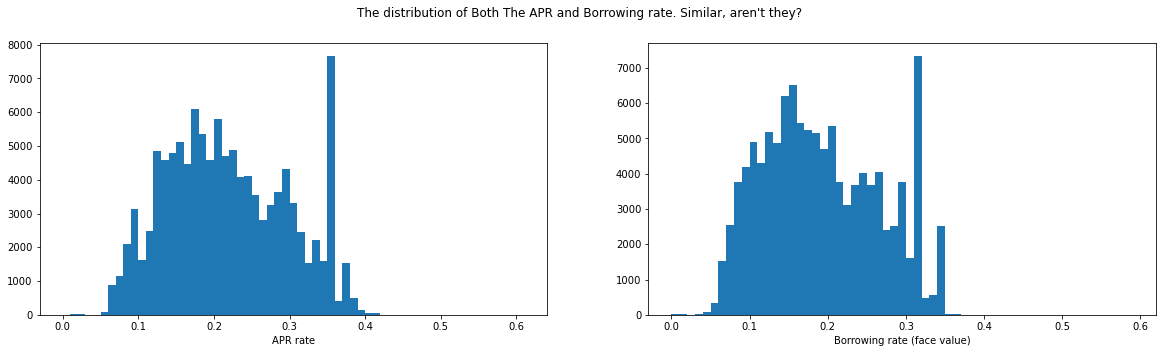

In [86]:
plt.figure(figsize=(20,5))
plt.suptitle("The distribution of Both The APR and Borrowing rate. Similar, aren't they?")

plt.subplot(1, 2, 1)
bins = np.arange(0, df.BorrowerAPR.max()+0.1, 0.01)
plt.hist(data=df, x='BorrowerAPR', bins=bins)
plt.xlabel('APR rate')

plt.subplot(1, 2, 2)
bins = np.arange(0, df.BorrowerRate.max()+0.1, 0.01)
plt.hist(data=df, x='BorrowerRate', bins=bins)
plt.xlabel('Borrowing rate (face value)');

C:\Users\Semseman\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


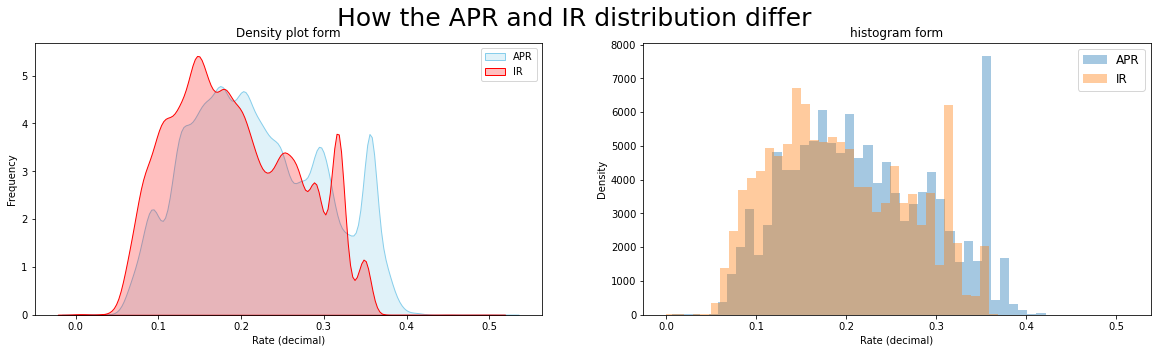

In [90]:
plt.figure(figsize=(20,5))
fig = plt.gcf()
fig.suptitle("How the APR and IR distribution differ", fontsize=25)

plt.subplot(1,2,1)
p1=sb.kdeplot(df['BorrowerAPR'], shade=True, color="skyblue")
p1=sb.kdeplot(df['BorrowerRate'], shade=True, color="r")
plt.legend(['APR', 'IR'])
plt.title('Density plot form')
plt.xlabel('Rate (decimal)')
plt.ylabel('Frequency');


plt.subplot(1,2,2)
sb.distplot(df['BorrowerAPR'],  kde=False,label='APR')
sb.distplot(df['BorrowerRate'],  kde=False, label='IR')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('histogram form')
plt.xlabel('Rate (decimal)')
plt.ylabel('Density');

The ***"Rates density distribution"*** emphasizes the widening gap between the two rates with both of them showing a multimodal distribution of values.

### 7. Listing Categories:

"`ListingCategory`" is another categorical variable that informs us about the likely reasons for people to borrow for. 

I have derived this  variable from "`ListingCategory (numeric)`" variable that describes the different categories in terms of numbers representing the category of the listing that the borrower selected when posting their listing from 0 to 20. 
As per the variable dictionary; thodse numbers mapped as follows:

|Numeric encoding|Meaning|
|----------------|-------|
|0 | Not Available|
|1 | Debt Consolidation|
|2 | Home Improvement|
|3 | Business|
|4 | Personal Loan|
|5 | Student Use|
|6 | Auto|
|7 | Other|
|8 |Baby&Adoption|
|9 |Boat|
|10| Cosmetic Procedure|
|11| Engagement Ring|
|12| Green Loans|
|13| Household Expenses|
|14| Large Purchases|
|15| Medical/Dental|
|16| Motorcycle|
|17| RV|
|18| Taxes|
|19| Vacation|
|20| Wedding Loans"|

So, i have created the new categorical variable "`ListingCategory`" to enable a more meaningful and robust analysis of such listed reasons for borrowing.Graphing them through barchart showed that debt consolidation is the most prevalent category for all listings.

This variable will be used in the bivariate analysis section to learn about its associations with other variables.

In [91]:
reasons = {0:"Not Available", 1: "Debt Consolidation", 2: "Home Improvemen", 3: "Business", 4: "Personal Loan",
5:"Student Use", 6: "Auto", 7: "Other",  8:"Baby&Adoption", 9:"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring",
12: "Green Loans", 13:"Household Expenses", 14:"Large Purchases", 
15:"Medical/Dental", 16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

df['ListingCategory (numeric)'].nunique()

21

In [92]:
df['ListingCategory'] = df['ListingCategory (numeric)'].map(reasons)
df.ListingCategory.unique()

array(['Not Available', 'Home Improvemen', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

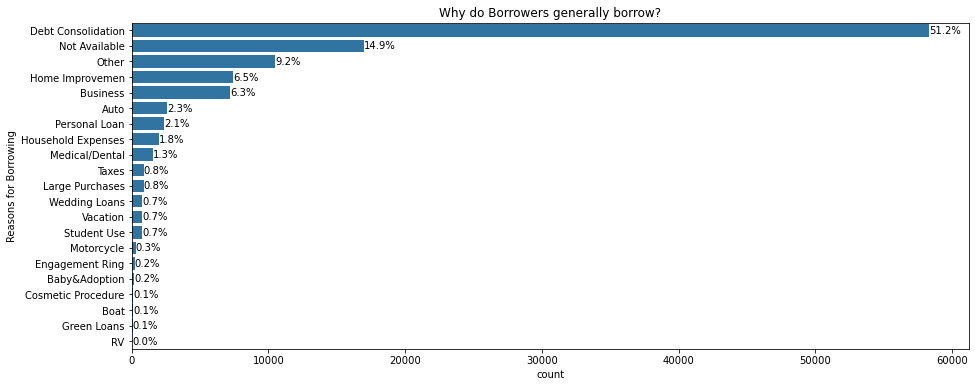

In [94]:
# Plotting the univariate graph of the reasons of haveing a loan
plt.figure(figsize=(15,6))
reasons_ordered = df.ListingCategory.value_counts()
sb.countplot(data=df, y='ListingCategory', color=sb.color_palette()[0], order= reasons_ordered.index)
plt.ylabel('Reasons for Borrowing')

# displaying the text in front of each bar
for i in range(reasons_ordered.shape[0]):
    count = reasons_ordered[i]
    pct_string = "{:0.1f}%".format(count*100/reasons_ordered.sum())
    plt.text(count+1, i, pct_string, va = "center")
    
plt.title('Why do Borrowers generally borrow?');

### 8. Borrowers' Income Range:

Investigating the Income_range variable revealed that more than 50% of listings fall between \\$25,000 to \\$74,999. 

In [95]:
df.IncomeRange.describe()

count             113932
unique                 8
top       $25,000-49,999
freq               32191
Name: IncomeRange, dtype: object

In [96]:
ordered_incr = df.IncomeRange.value_counts(sort=False)

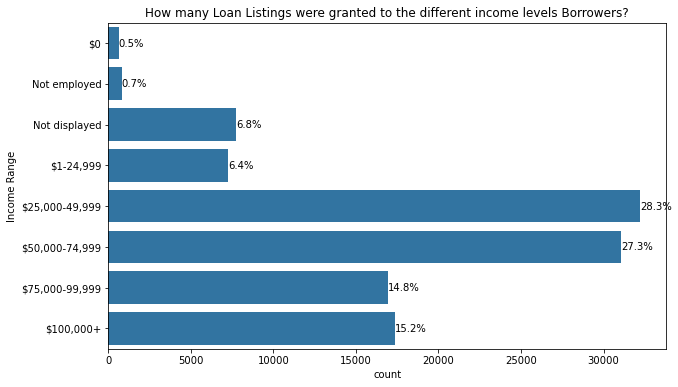

In [99]:
plt.figure(figsize=(10,6))
sb.countplot(data=df, y='IncomeRange', color=sb.color_palette()[0])
plt.ylabel('Income Range')
# displaying the text in front of each bar
for i in range(ordered_incr.shape[0]):
    count = ordered_incr[i]
    pct_string = "{:0.1f}%".format(count*100/ordered_incr.sum())
    plt.text(count+1, i, pct_string, va = "center")
    
plt.title('How many Loan Listings were granted to the different income levels Borrowers?');

### 9. Debt to Income Ratio:

Another crucial bit of information about borrowers is how much of their income they contribute to debt repay. 

As per the datasst's variable dictionary, "`DebtToIncomeRatio`";	the debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

Another severly right skewed numerical variable as shown in its summary statistics. 75% of the listings are contributing less than 32% of their income to repay the loan.


In [100]:
df.DebtToIncomeRatio.describe()

count    105378.000000
mean          0.275952
std           0.551771
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

The histogram provides a clear overview of the debt-to-income distribution as most of the date are lumped up below the 0.5 mark of the Debt/Income axis.

***Only 813 borrowers had their debt to income ratio equal to or larger than 1.*** 

AS per the histograms shown in the upcoming slide, a decision was made to split the data into two groups, one for those records with debt/income ratio equal to or greater than 1 and the other less than 1 to zoom in into the distribution of each and try to glean some insights

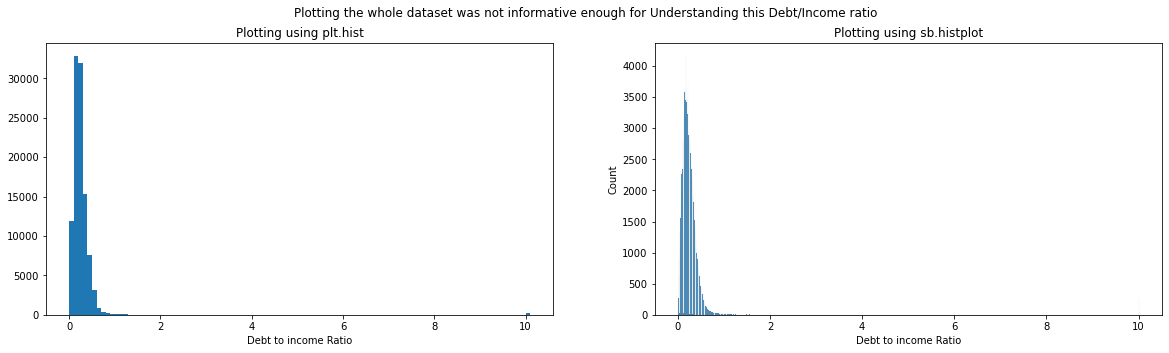

In [113]:
plt.figure(figsize=(20,5))
plt.suptitle('Plotting the whole dataset was not informative enough for Understanding this Debt/Income ratio')

plt.subplot(1,2,1)
bins=np.arange(0, df.DebtToIncomeRatio.max()+0.1, 0.1)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('Debt to income Ratio')
plt.title('Plotting using plt.hist');

# to glean and idea of the appropriate binning
plt.subplot(1,2,2)
sb.histplot(data=df, x='DebtToIncomeRatio')
plt.xlabel('Debt to income Ratio')
plt.title('Plotting using sb.histplot');

In [101]:
# What is the number of borrowers who the debt to income ratio is larger than 1 
(df.DebtToIncomeRatio >= 1).sum()

813

In [103]:
df['year'] = df.ListingCreationDate.dt.year
# What are the years in which this happened
df[df.DebtToIncomeRatio >= 1].groupby('year').count()['ListingCreationDate']

year
2006     82
2007    335
2008     65
2009     10
2010     24
2011     74
2012    148
2013     75
Name: ListingCreationDate, dtype: int64

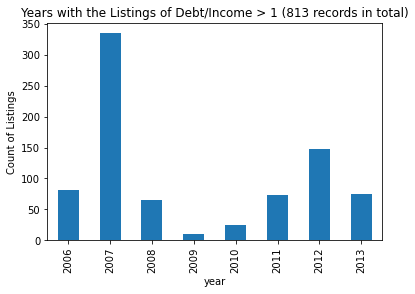

In [114]:
df[df.DebtToIncomeRatio >= 1].groupby('year').count()['ListingCreationDate'].plot(kind='bar')
plt.title('Years with the Listings of Debt/Income > 1 (813 records in total)')
plt.ylabel('Count of Listings');

Intrigued by the extremely large values of the debt to income ratios, i decided to learn more by zooming in into those values. So, subseted the original data to include listings with debt to income ratios larger than or equal to 1 and named the subseted data “`extreme_DTI`”. There’re 813 listings of debt to income ratio above 1.

There is a surge in the number of loan listings granted with a debt to income ratio in 2007 which needs which can be invetigated in relation to other variables latter.

> Getting the 99 percentile of the variable shows that 99% of borrowers contribute less that 86% of their income toward loan repay.

In [106]:
# This dataframe will be used later in the our analysis
extreme_DTI = df[df.DebtToIncomeRatio >= 1]
extreme_DTI.shape

(813, 84)

In [107]:
# Getting the 99 percentile
df.DebtToIncomeRatio.quantile(0.99)

0.86

Graphing the points up to the 99 percentild of the debt to income ratio  to get a more meaningful distribution of the variable. As shown in the graph, it's less positively skewed than when plotting the entirety of data points with a clear information about the most commonly exhibited debt to income ratios to lie betwenn 0.10 - 0.30.

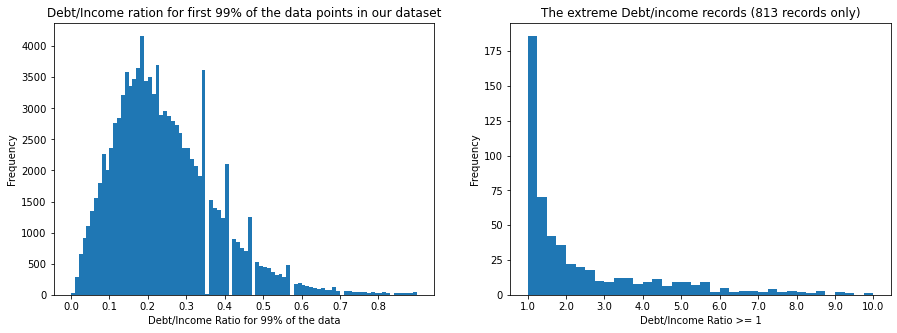

In [122]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
bins = np.arange(1, extreme_DTI.DebtToIncomeRatio.max()+0.05, 0.25)
tick_loc= np.arange(1,10.2, 1)
tick_label = ['{:0.1f}'.format(v) for v in tick_loc]
plt.hist(data=extreme_DTI, x='DebtToIncomeRatio', bins=bins)
plt.xticks(tick_loc, tick_label)
plt.xlabel('Debt/Income Ratio >= 1')
plt.ylabel('Frequency')
plt.title('The extreme Debt/income records (813 records only)');


plt.subplot(1,2,1)
bins = np.arange(0, df.DebtToIncomeRatio.quantile(0.99)+0.05, 0.01)
tick_loc= np.arange(0,0.9, 0.1)
tick_label = ['{:0.1f}'.format(v) for v in tick_loc]
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins)
plt.xticks(tick_loc, tick_label)
plt.xlabel('Debt/Income Ratio for 99% of the data')
plt.ylabel('Frequency')
plt.title('Debt/Income ration for first 99% of the data points in our dataset');

### 10. Investors’ Insights - The Lender Yield:
Moving to the investors, i was interested in looking over the lender’s yield. From its statistical five number summary we can see that it’s almost normally distributed with the mean and the median pretty close.

|count    |113932|
|---------|------|
|mean    |      0.182701|
|std     |      0.074517|
|min     |     -0.010000|
|25%     |      0.124175|
|50%     |      0.173000|
|75%     |      0.240000|
|max     |      0.492500|

In [110]:
df.LenderYield.describe()

count    113932.000000
mean          0.182701
std           0.074517
min          -0.010000
25%           0.124175
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

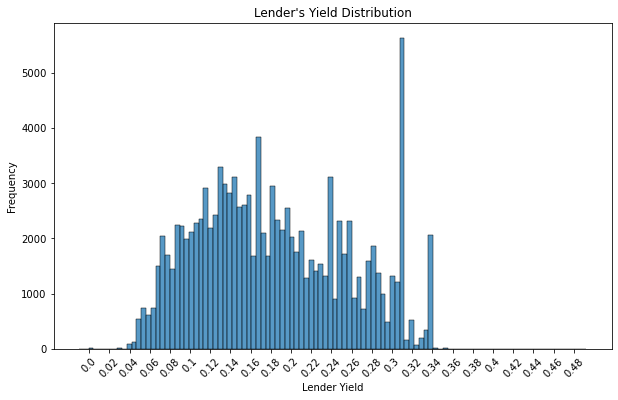

In [123]:
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='LenderYield')
plt.xticks(np.arange(0, 0.5, 0.02), np.around(np.arange(0, 0.5, 0.02),2), rotation=45)
plt.xlabel('Lender Yield')
plt.ylabel('Frequency')
plt.title('Lender\'s Yield Distribution');

By plotting the histogram, we can see the actual variable’s distribution - with its peaks and vallies - the yeild of 31% is the most common with some very rare cases of negative 10% yield. Meanwhile most of the yields are around the 15% mark.

### 11. The Investors count:
The number of investors that funded the loan. Another severely positively skewed variable.

In [125]:
# investors count
df.Investors.describe()

count    113932.000000
mean         80.477680
std         103.240534
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

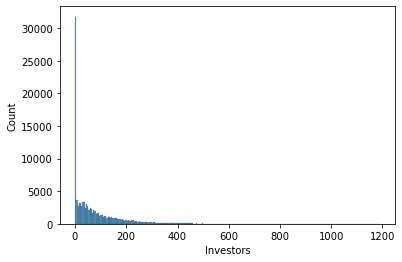

In [126]:
sb.histplot(data=df, x='Investors');

In [127]:
# investigating the investors count value counts. 
df.Investors.value_counts()

1      27814
2       1386
3        991
4        827
5        753
       ...  
881        1
801        1
752        1
715        1
831        1
Name: Investors, Length: 751, dtype: int64

In [128]:
df.Investors.dtype

dtype('int64')

What was figured out above about this variable, creating a new `Investors_cutoffs` variable that can be used later in our bivariate analysis would be more helpful

In [129]:
# maping the values to categories:
def num_to_cat(row):
    if row['Investors'] == 1:
        return 'one'
    if row['Investors'] in range(2,11):
        return '2-10'
    if row['Investors'] in range(11,51):
        return '11-50'
    if row['Investors'] in range(51,101):
        return '51-100'
    if row['Investors'] in range(101,251):
        return '101-250'
    if row['Investors'] in range(251, 501):
        return '251-500'
    if row['Investors'] > 500:
        return 'Above 500'

df['Investors_cutoffs'] = df.apply (lambda row: num_to_cat(row), axis=1)  
df.Investors_cutoffs.unique()

array(['251-500', 'one', '11-50', '101-250', '51-100', '2-10',
       'Above 500'], dtype=object)

In [130]:
df.Investors_cutoffs.value_counts()

one          27814
11-50        25489
101-250      24161
51-100       20583
2-10          7579
251-500       7494
Above 500      812
Name: Investors_cutoffs, dtype: int64

In [131]:
df.Investors_cutoffs.unique()

array(['251-500', 'one', '11-50', '101-250', '51-100', '2-10',
       'Above 500'], dtype=object)

In [132]:
# Making the Investors variable as a categorical one:
investor_class = ["one", "2-10", "11-50", "51-100", "101-250", "251-500", "Above 500"]

iclasses = pd.api.types.CategoricalDtype(ordered=True, categories=investor_class)
df['Investors_cutoffs'] = df.Investors_cutoffs.astype(iclasses)

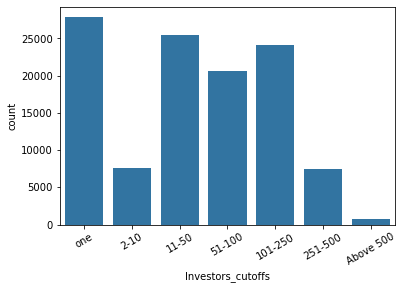

In [133]:
# Plotting as a countplot
sb.countplot(data=df, x='Investors_cutoffs', color=sb.color_palette()[0])
plt.xticks(rotation=30);

A clearer image is obtained by graphing the “Investors_cuttoffs” variable, the listings that have one investors are the largest group, come closely after it the listings with “11-50” investors and those with “101-250” investors.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. Based on the mutually exclusive categories of the loan status variable, defining a new variable for the severity of delinquency of a loan would facilitate the analysis and grouping of other variables conditional on this new variable with less categories than that of `LoanStatus` to be more manageable. Hence the **`delinquency`** variable is created

> 2. **`ListingCategory`** is another categorical variable that informs us about the likely reasons people my decide to borrow for. I have derived this variable from `ListingCategory (numeric)` variable that describes the different categories in terms of numbers representing the category of the listing that the borrower selected when posting their listing from 0 to 20

> 3. **`Investors_cutoffs`** to discretize the `investors` variables for more efficient storytelling of the data regarding this variable, allowing the reader to concentrate on major trends in the data. 

> * The `DebtToIncomeRatio` is a severly right skewed numerical variable, i opted to make a second dataframe to examine the few extreme outliers of this variable at glance. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have used some subsetting and pivoting of the data to draw the time series graphs and the maps for the states, I have created many variables and subsets of data as needed:

1. "`loans_count_df`" a geo dataframe to plot the number of listing on the united states geographical map.

2. Several time series graphs for Loan Listings (yearly, quarterly and monthly)to get an overview of the market.

3. "`year`" is a new variable in the main dataset for listing creation date to glean information about each year's data.

4. "`extreme_DTI`" is a subset dataframe for zooming in on the listings with extreme debt to income ratios above 1.

## Bivariate Exploration

### 1. An Overview of the overall Loan Market -  Listings’ count over time:
First and foremost, an overview of the trend of loan listings across the dataset time span sheds light on the general direction of the loans market; either growing, declining or going steady. Through the following time series graphs, it seems that there’s an upward trend in the number of listing through the dataset period from late 2005 to early 2014. I have used several to explore this aspect.

In [135]:
# Create a year column
df['year'] = df.ListingCreationDate.dt.year

#### Bar Plot for Yearly listings count

> * The data time variables are mostly switched to their higher levels of dates and sometimes manipulated to focus only on the monthly or yearly levels to adjust for the graphs’ noise.
> * The total number of listings is growing since 2010.

In [136]:
# the listings count for each year 
df.ListingCreationDate.dt.year.value_counts(sort=False)

2005       23
2006     6209
2007    11557
2008    11262
2009     2206
2010     5530
2011    11442
2012    19556
2013    35413
2014    10734
Name: ListingCreationDate, dtype: int64

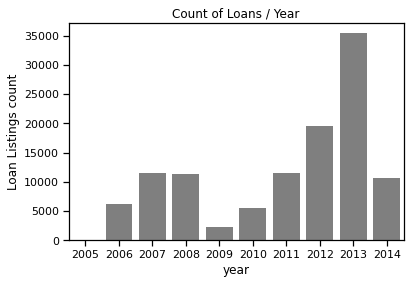

In [137]:
sb.set_context(context='notebook')
sb.countplot(data=df, x='year', color=sb.color_palette()[7])
plt.ylabel('Loan Listings count')
plt.title('Count of Loans / Year');

Another approach was to use some line plots, one way was to create a separate dataframe with a date index to enable resampling

In [138]:
# a dataframe with data index
df_time = df.set_index('ListingCreationDate')

In [139]:
# Grouping dataframe with date index with the colum for listing creation date and creating a smaller dataframe from it. 
time_series_listings = df_time.groupby('ListingCreationDate').size().to_frame().rename(columns={"ListingCreationDate":'date', 0:'count'})

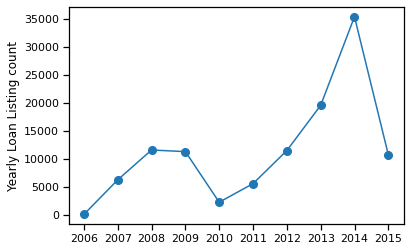

In [140]:
# plotting the yearly count of listings across years
fig, ax = plt.subplots()
ax.plot(time_series_listings[['count']].resample('y').sum(), marker='o', markersize=8, linestyle='-', label='Yearly Count Resample')
ax.set_ylabel('Yearly Loan Listing count');

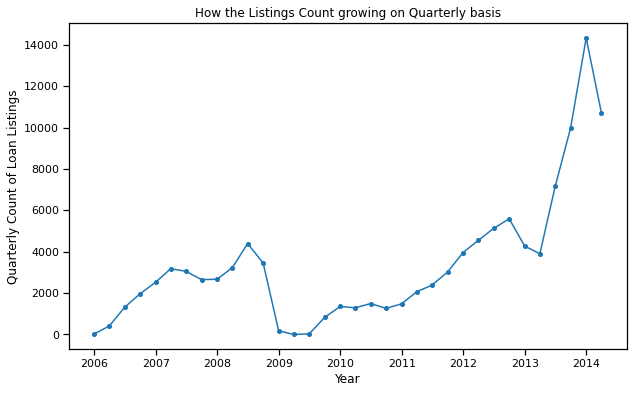

In [143]:
# Using a quarter resamling to dig deeper into understanding the flactuation of listings count
plt.figure(figsize=(10,6))
plt.plot(time_series_listings[['count']].resample('Q').sum(), marker='.', markersize=8, linestyle='-', label='Quarterly Count Resample')
plt.xlabel('Year')
plt.ylabel('Quarterly Count of Loan Listings')
plt.title('How the Listings Count growing on Quarterly basis');

Another more direct approach from the main datafamre was to group by the attributes of the listing creation date column (year, month)

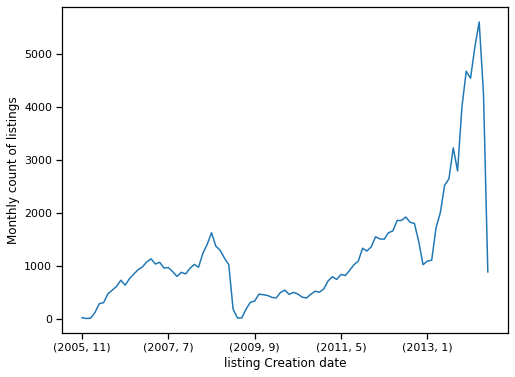

In [144]:
df.groupby([df.ListingCreationDate.dt.year, 
            df.ListingCreationDate.dt.month]).size().plot(style='-',figsize=(8,6))
plt.xlabel('listing Creation date')
plt.ylabel('Monthly count of listings');

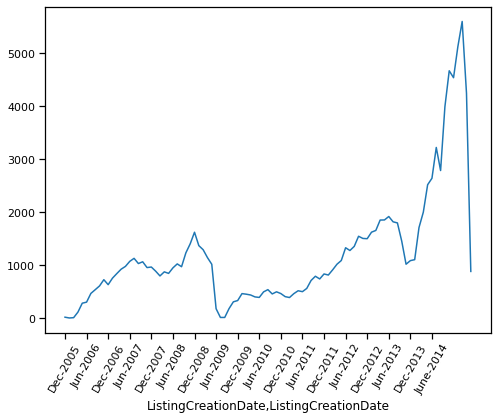

In [145]:
df.groupby([df.ListingCreationDate.dt.year, 
            df.ListingCreationDate.dt.month]).size().plot(style='-',figsize=(8,6))

ticks = np.arange(0,90,5)
labels = ['Dec-2005', 'Jun-2006', 'Dec-2006', 'Jun-2007', 'Dec-2007', 'Jun-2008', 'Dec-2008', 'Jun-2009'
         , 'Dec-2009', 'Jun-2010', 'Dec-2010', 'Jun-2011', 'Dec-2011', 'Jun-2012', 'Dec-2012', 'Jun-2013',
         'Dec-2013','June-2014']
plt.xticks(ticks= ticks, labels=labels, rotation=60);

### 2. Loan Original amount and delinquency:
As aforementioned, during creating the delinquency variable spotted that there’s only 5 observation of cancelled listings that i prefered to remove. Then, i wanted to look into the pattern of the different delinquency levels across the different loan original amount. It was unexpected to find out that the loans that ranges **from \\$2,000 to \\$5,000** in total amount are sharing the most commonly `chargedoff`, `defaulted`, `delinquent` as well as good standing loan stutuses.

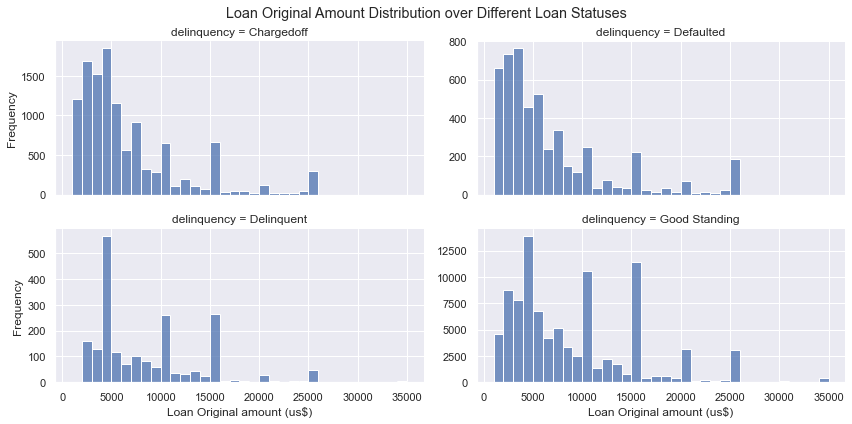

In [150]:
sb.set()
bins = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+1, 1000)
g =sb.FacetGrid(data=df, col='delinquency', sharey=False, col_wrap=2, aspect=2)
g.map(sb.histplot, 'LoanOriginalAmount', bins=bins)
g.set_xlabels('Loan Original amount (us$)')
g.set_ylabels('Frequency')
g.fig.suptitle('Loan Original Amount Distribution over Different Loan Statuses')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.90);

The following stacked histogram shows that the proportions of **chargedoff & defaulted** loans hovers around (15% - 25%) of the loans of values ranging from \\$1,000 to \\$24,000,then at the higher values that above $25,000, the proportion of defaulted and chargedoff almost vanished. This indicates that loans with lower amounts are generally riskier that those of higher amounts. 

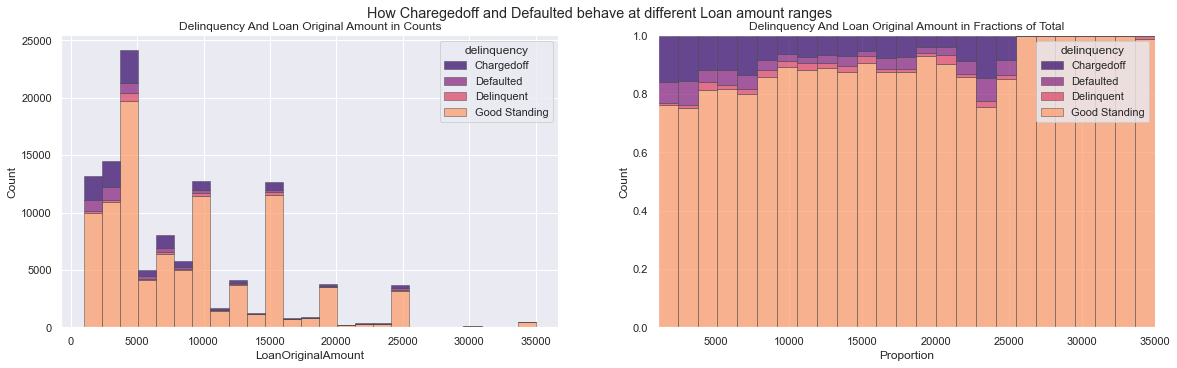

In [151]:
f, ax = plt.subplots(figsize=(16, 5))
f.suptitle('How Charegedoff and Defaulted behave at different Loan amount ranges')
f.tight_layout()
f.subplots_adjust(top=0.90)

plt.subplot(1,2,1)
sb.despine(f)
sb.histplot(
    df,
    x="LoanOriginalAmount", hue="delinquency",
    multiple="stack",
    bins= 25,
    palette="magma",
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Delinquency And Loan Original Amount in Counts')

plt.subplot(1,2,2)
sb.despine(f)
sb.histplot(
    df,
    x="LoanOriginalAmount", hue="delinquency",
    multiple="fill",
    bins= 25,
    palette="magma",
    edgecolor=".3",
    linewidth=.5,
)
plt.xlabel('Proportion')
plt.title('Delinquency And Loan Original Amount in Fractions of Total');

### 3. The association between Loan Amount and Listing Category:

As illustrated by the following boxplots, `Debt consolidation` has the highest median and maximum loan amounts, surprisingly followed by `baby & adoption` category then comes the `business`, `green loans` and `wedding loans`.

Recall from the univariate analysis of the listing category that debt consolidation had some **58308** listings while baby & adoption had just **199** listings in total.

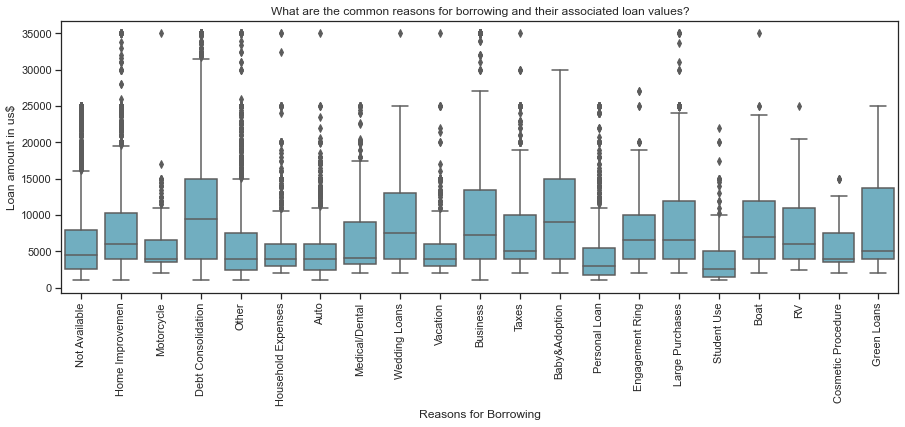

In [157]:
sb.set_style('ticks')
plt.figure(figsize=(15,5))
sb.boxplot(data=df, x='ListingCategory', y='LoanOriginalAmount', color=sb.color_palette()[9])
plt.xticks(rotation=90)
plt.xlabel('Reasons for Borrowing')
plt.ylabel('Loan amount in us$')
plt.title('What are the common reasons for borrowing and their associated loan values?');

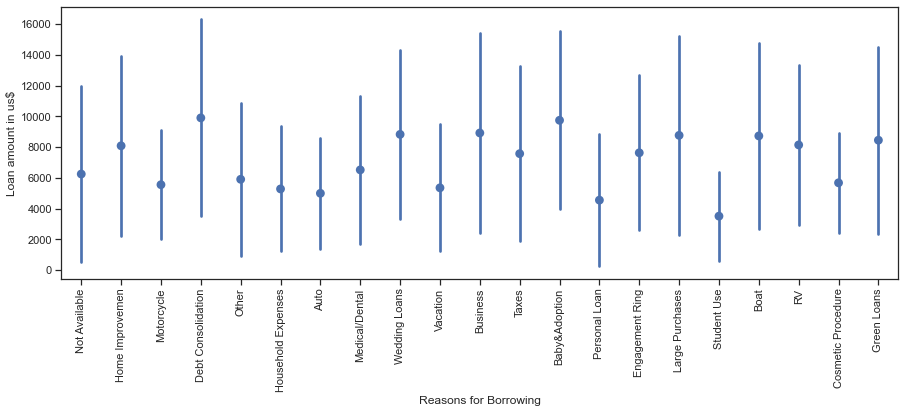

In [158]:
plt.figure(figsize=(15,5))
sb.pointplot(data=df, x='ListingCategory', y='LoanOriginalAmount', linestyles="", ci='sd')
plt.xticks(rotation=90)
plt.xlabel('Reasons for Borrowing')
plt.ylabel('Loan amount in us$');

### 4. The Debt to Income ratio and Income Range:

Based on the variable dictionary, borrowers can have their Debt To Income ratio anywhere between 0 and 10.01. Despite the hardships the borrower might put himself into to pay more than 100% of his/her income to repay a debt for 12 or 36 or even 60 months, we see some going for those extremes of debt to income ratio. 

An eye-catching observation is that large number of not employed borrowers are selecting really high debt to income ratios. May be because they had been expecting to have a job soon. This finding became very clear with the summary statistics of this category as their mean and 3rd quartile records are the highest among all categories.

In [1487]:
# summary statistics of Debt/Income ratio for the different income ranges
df.groupby('IncomeRange').DebtToIncomeRatio.describe()

,count,mean,std,min,25%,50%,75%,max
IncomeRange,,,,,,,,
$0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Not employed,78.0,3.328205,4.505497,0.01,0.16,0.295,10.01,10.01
Not displayed,7613.0,0.297126,0.938243,0.00,0.09,0.160,0.26,10.01
"$1-24,999",6361.0,0.736972,1.758851,0.02,0.19,0.320,0.50,10.01
"$25,000-49,999",29880.0,0.278872,0.169042,0.01,0.17,0.260,0.36,7.90
"$50,000-74,999",29360.0,0.245651,0.139314,0.01,0.16,0.230,0.32,10.01
"$75,000-99,999",16015.0,0.213700,0.103954,0.01,0.14,0.200,0.28,2.55
"$100,000+",16071.0,0.180597,0.119405,0.00,0.12,0.170,0.23,10.01


Pondering the other categories, for the zero income category there is no records at all as dividing by zero yields infinity, so it’s sensible why the dataset didn’t include their debt to income ratio.

Another final thought is that as the income range increased we can see that borrowers tend to be more conservative in determining their debt to income ratios.

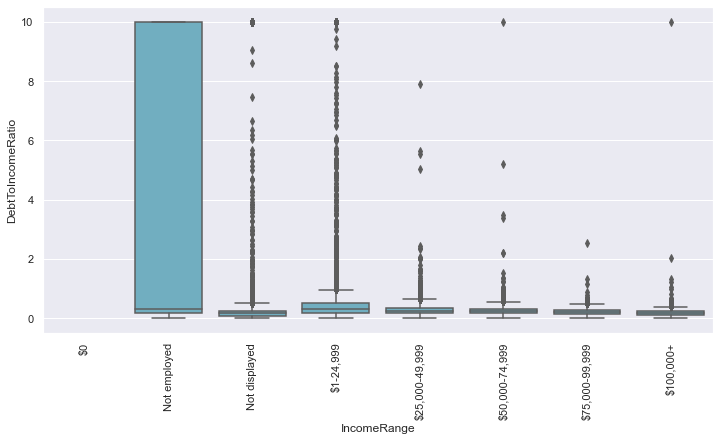

In [1485]:
# a boxplot for the different income classes showing the debt/income ratio disribution across each class
plt.figure(figsize=(12,6))
sb.boxplot(data=df, x='IncomeRange', y='DebtToIncomeRatio', color=sb.color_palette()[9])
plt.xticks(rotation=90);

A Deeper look on the 813 observation of the extreme debt/income ratio, we can spot that the not employed, not dispalyed and those with income range of \\$1-24,999 are the highest have relatively high counts in the extreme end of a debt/income ration of 10

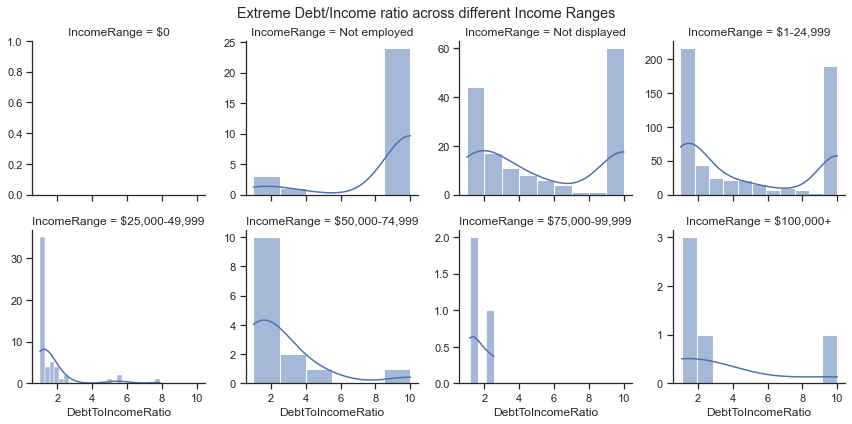

In [159]:
f = sb.FacetGrid(data=extreme_DTI, col='IncomeRange', col_wrap=4, height=3, sharey=False)
f.map(sb.histplot, 'DebtToIncomeRatio', kde=True)
f.fig.suptitle('Extreme Debt/Income ratio across different Income Ranges')
f.fig.tight_layout()
f.fig.subplots_adjust(top=0.90);

Mean while the pattern are quite similar across different income groups who had listing with debt/income ratio below one. Right skewed distribution with most of the datapoints are clustered below the 0.5 debt/income ratio.

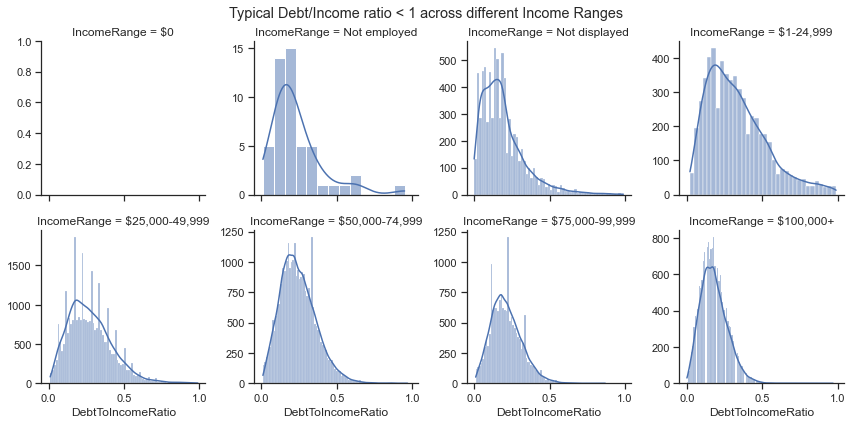

In [161]:
f = sb.FacetGrid(data=df[df.DebtToIncomeRatio < 1], col='IncomeRange', col_wrap=4, height=3, sharey=False)
f.map(sb.histplot, 'DebtToIncomeRatio', kde=True)
f.fig.suptitle('Typical Debt/Income ratio < 1 across different Income Ranges')
f.fig.tight_layout()
f.fig.subplots_adjust(top=0.90);

### 5. Loan Amount & Loan Term 

Investigating the potential association between loan term and amount; the following boxplot and violin plots show that the median loan amount of the 60 months term loan are typically higher than that of the 36 months which in turn higher than the 12 months term loans. 

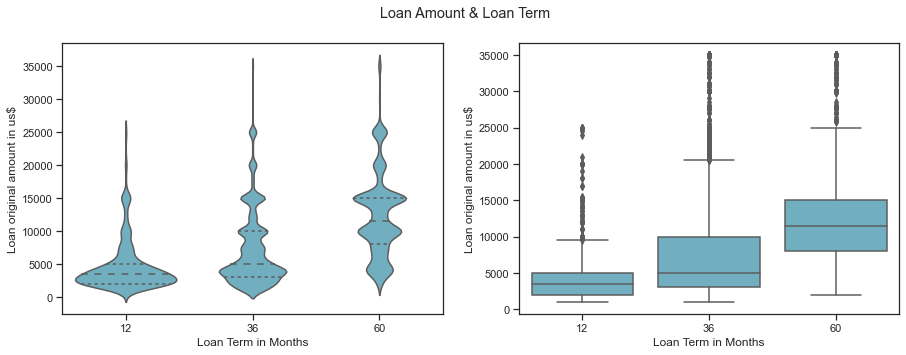

In [162]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.violinplot(data=df, x='Term', y='LoanOriginalAmount', color=sb.color_palette()[9], inner='quartile')
plt.xlabel('Loan Term in Months')
plt.ylabel('Loan original amount in us$');


plt.subplot(1,2,2)
sb.boxplot(data=df, x='Term', y='LoanOriginalAmount', color=sb.color_palette()[9])
plt.xlabel('Loan Term in Months')
plt.ylabel('Loan original amount in us$')

plt.suptitle('Loan Amount & Loan Term ');

### 6. Credit Ratings and Lender Yield:

It holds true!! "With higher risks, higher returns come". Risk-Return Tradeoff is really apparant here.  
Visualizing the association between prosper ratings and the lender yields for listings after July 1st 2009, we can see that as the median lender's yield increases with the prosper rating of lower credit ratings.

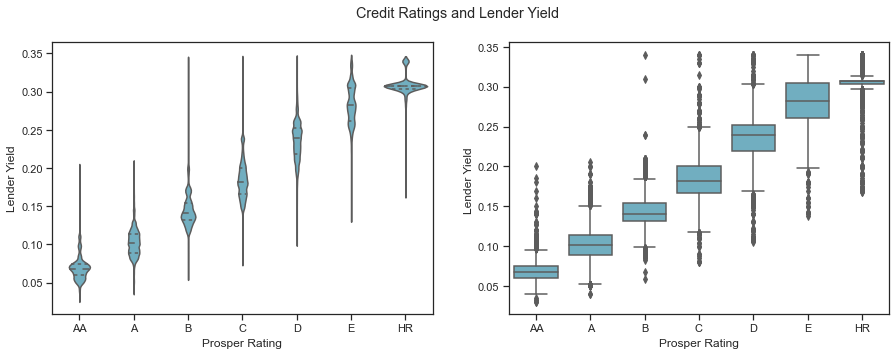

In [163]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.violinplot(data=df, x ='ProsperRating (Alpha)', y = 'LenderYield', color=sb.color_palette()[9], inner='quartile')
plt.xlabel('Prosper Rating')
plt.ylabel('Lender Yield');


plt.subplot(1,2,2)
sb.boxplot(data=df, x ='ProsperRating (Alpha)', y = 'LenderYield', color=sb.color_palette()[9])
plt.xlabel('Prosper Rating')
plt.ylabel('Lender Yield ')

plt.suptitle('Credit Ratings and Lender Yield');

### 7. Income range & Prosper rating:
The two categorical variables are associated to each other, as expected, as the income increases the credit ratings gets higher. I opted to just focus on the records with `"ProsperRating (Alpha)"` as credit ratings as they are the main ratings used since July 2007. Notice also that the listings in which the `"IncomeRange"` was not displayed, had no credit ratings, consequently, i have exculded them from the data plotted in the bar chart below. 

> From the chart, it's evident that as the income increases the credit ratings gets improved. 

> Plotting income ranges' barchart along with their prospective Prosper ratings yields a very interesting step-wise graphic, from which we can claim that higher income borrowers tend to have better prosper ratings. Moreover, borrowers who reported their income as not employed tend to get higher prosper ratings than those who reported zero income. 

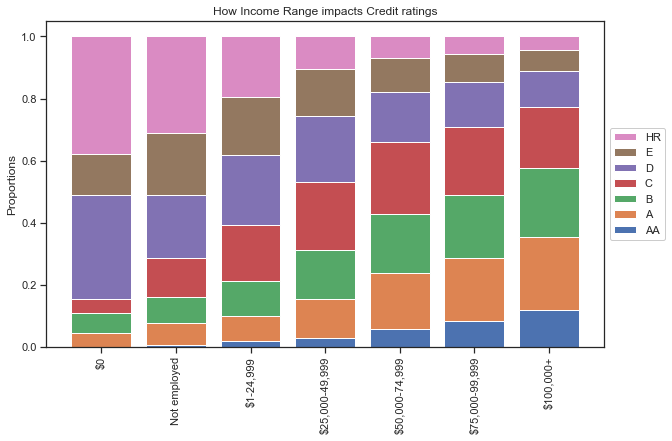

In [164]:
IncomeRange_order = ['$0' , 'Not employed' , '$1-24,999' , '$25,000-49,999' , '$50,000-74,999' , '$75,000-99,999' , '$100,000+']
ProsperRating_order = ['AA' , 'A' , 'B' , 'C' , 'D' , 'E' , 'HR']
df_sub = df[(~df['ProsperRating (Alpha)'].isnull())&(df.IncomeRange != 'Not displayed')]


artists = [] # for storing references to plot elements
baselines = np.zeros(len(IncomeRange_order))
IncomeRange_counts = df_sub.IncomeRange.value_counts()

plt.figure(figsize=(10, 6))
# for each second-variable category:
for i in range(len(ProsperRating_order)):
    # isolate the counts of the first category,
    cat2 = ProsperRating_order[i]
    inner_counts = df_sub[df_sub['ProsperRating (Alpha)'] == cat2]['IncomeRange'].value_counts()
    inner_props = inner_counts / IncomeRange_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(IncomeRange_order)),
                   height = inner_props[IncomeRange_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[IncomeRange_order]

plt.xticks(np.arange(len(IncomeRange_order)), IncomeRange_order, rotation=90)
plt.legend(reversed(artists), reversed(ProsperRating_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6)
plt.ylabel('Proportions')
plt.title('How Income Range impacts Credit ratings');

The heatmap accentuates the association between income level and credit ratings as the count of listings goes up with higher income levels and higher credit ratings indicating higher trust of lending entities.  

In [165]:
# Use group_by() and size() to get the number of listings in each combination of the two variable levels as a dataframe
ip_count = df_sub.groupby(['ProsperRating (Alpha)', 'IncomeRange']).size().reset_index(name='count')
ip_count.head()

,ProsperRating (Alpha),IncomeRange,count
0,AA,$0,0
1,AA,Not employed,5
2,AA,Not displayed,0
3,AA,"$1-24,999",88
4,AA,"$25,000-49,999",736


In [167]:
# Use DataFrame.pivot() to rearrange the data, to have prosper ratings on rows and income range of columns
ip_count =  ip_count.pivot(index = 'ProsperRating (Alpha)', columns = 'IncomeRange', values = 'count')

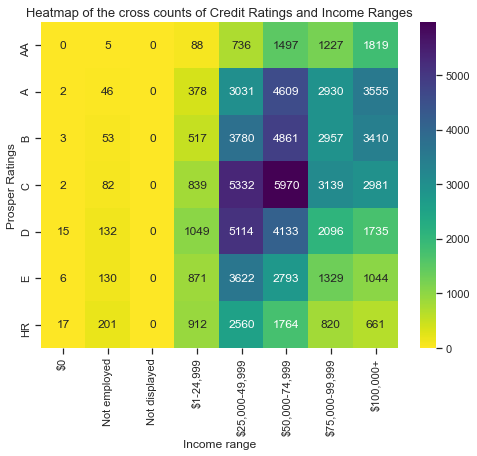

In [176]:
# plotting a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(ip_count, annot = True, fmt = 'd', cmap="viridis_r")
plt.ylabel('Prosper Ratings')
plt.xlabel('Income range')
plt.title('Heatmap of the cross counts of Credit Ratings and Income Ranges',fontdict= {'fontsize': 13});

### 8. Borrower Annual Percentage Rate and Lender Yield:

A clear linear positive relationship between the two variables.

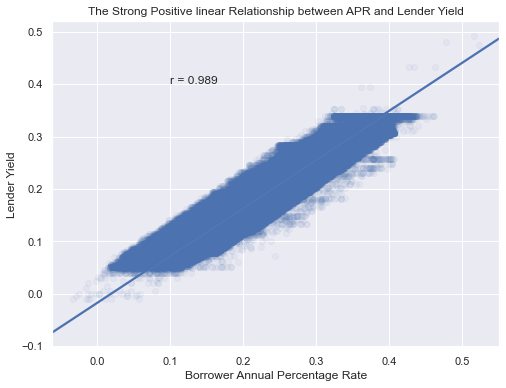

In [186]:
sb.set()
plt.figure(figsize=(8,6))
sb.regplot(data=df, x='BorrowerAPR', y='LenderYield',  x_jitter=0.05, truncate=False, scatter_kws={'alpha':1/20})
plt.xlabel('Borrower Annual Percentage Rate')
plt.annotate('r = 0.989', xy=(0.1, 0.4), fon)
plt.ylabel('Lender Yield')
plt.title('The Strong Positive linear Relationship between APR and Lender Yield');

In [187]:
# The correlation coefficient of 0.9893 ensures the last graph’s finding.
np.around(df.BorrowerAPR.corr(df.LenderYield),3)

0.989

### 9. Borrower rate and Estimated Loss:

Investigating the association between the borrower interest rate and the Estimated loss (which is **the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.**). A positive relationship seems to exist between the 2 variables.

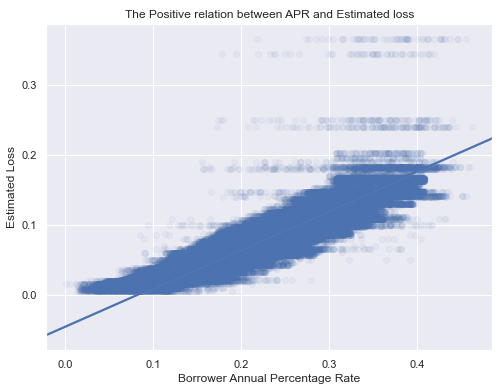

In [190]:
df_sub = df[df.ListingCreationDate > "2009-07-01"]
plt.figure(figsize=(8,6))
sb.regplot(data=df_sub, x='BorrowerAPR', y='EstimatedLoss',  x_jitter=0.05, truncate=False, scatter_kws={'alpha':1/20})
plt.xlabel('Borrower Annual Percentage Rate')
plt.annotate('r = 0.95', xy=(0.1, 0.4))
plt.ylabel('Estimated Loss')
plt.title('The Positive relation between APR and Estimated loss');

The correlation coeffcient of 0.95 indicates the strong positive linear relationship between the two variables under disscussion

In [191]:
# The correlation coefficient of 0.9893 ensures the last graph’s finding.
np.around(df.BorrowerAPR.corr(df.EstimatedLoss),3)

0.95

### 10. Rates of borrowing:

The "BorrowerAPR" and the "BorrowerRate" are two nuemrical variables the measures the **The Borrower's Annual Percentage Rate (APR)** for the loan and **The Borrower's interest rate** for this loan respectively. 

To distinguish between them refer to [Interest rate vs. APR](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp); in brief the "BorrowerAPR" is more holistic as it includes not only the interest expense on the loan but also all fees and other costs involved in procuring the loan.
> The “Rates over time” graph illustrates the flactuations both exhibited across the dataset period from late 2005 to early 2014. The increasingly diverging lines indicates that the loan service’s cost that makes up the difference between the two variables have been slowly increasing over time. 

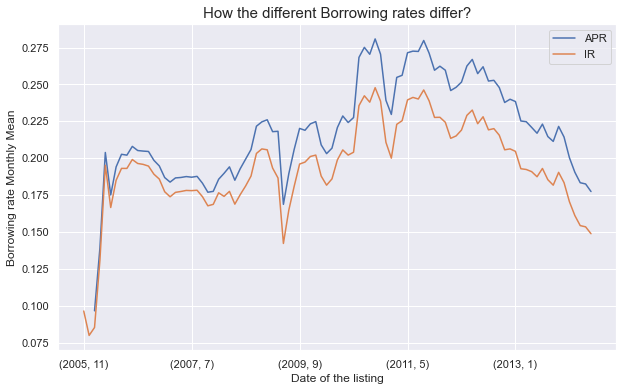

In [193]:
# The trend of Different definition of borrowing rate over time

plt.figure(figsize=(10,6))
df.groupby([df.ListingCreationDate.dt.year, 
            df.ListingCreationDate.dt.month]).mean()['BorrowerAPR'].plot(style='-',label="APR")
df.groupby([df.ListingCreationDate.dt.year, 
            df.ListingCreationDate.dt.month]).mean()['BorrowerRate'].plot(style='-',label="IR")

plt.legend()
plt.xlabel('Date of the listing')
plt.ylabel('Borrowing rate Monthly Mean')
plt.title('How the different Borrowing rates differ?', fontdict={'fontsize':15});

In [194]:
# create a function to plot the ecdf of both rates
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

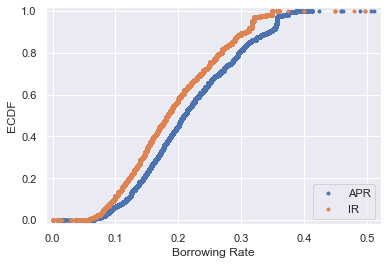

In [195]:
# Compute ECDFs
x_apr, y_apr = ecdf(df.BorrowerAPR)
x_ir, y_ir = ecdf(df.BorrowerRate)

# Plot all ECDFs on the same plot
_ = plt.plot(x_apr, y_apr, marker=".", linestyle="none")
_ = plt.plot(x_ir, y_ir, marker=".", linestyle="none")

# Annotate the plot
plt.legend(('APR', 'IR'), loc='lower right')
_ = plt.xlabel('Borrowing Rate')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. Through the time series graphs for listings counts over time, it seems that there’s an upward trend in the number of listing through the dataset period from late 2005 to early 2014. I have used several to explore this aspect.


2.  Loan Original amount across different delinquency levels were all right skewed distributions. Yet, inspite of the larger number of small loan amounts less then \\$10,000, they have the most frequent defaulted and chargedoff incidents, indicating high risk associated with lower value loans

3. The Debt-to-Income ratio and income range unveiled that unemployed borrowers are more inclined toward choosing high debt to income ratios as they are not generating regular revenue to count on. Also the higher income range borrowers seems to be more conservative in their debt to income ratios selection.


4. Debt consolidation has the highest median and maximum loan amounts, surprisingly followed by baby & adoption category then comes the business, green loans and wedding loans


5. Loan Amount & Loan Term graph showed that higher terms are generally accompained by higher loan amounts


6. Credit Ratings and Lender Yield boxplots graph revealed that with higher risks "with lower prosper ratings", higher returns can be achieved.


7. Income range & Prosper ratings stacked barplots showed proportions of ratings across each income range and illustrates the association between them as higher income borrowers tend to get higher prosper ratings.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Borrower Interest rate and Estimated loss; as the estimated loss was not among the features of interest, but the relationship is quiet strong and worth more analysis 

### What was the strongest relationship you found?

 Borrower Annual Percentage Rate and Lender Yield was the strongest relationship to spot between two variables.


## Multivariate Exploration
In this section, I dive deeper into investigating the associations between multiple variables of the dataset. There are some expected “strong” relationships which will be investigated but also any unusual or unexpected relationships, strong or weak, will also be called out for a deep dive into the details.

### 1. How Loan listings across different Income Levels behave accross years

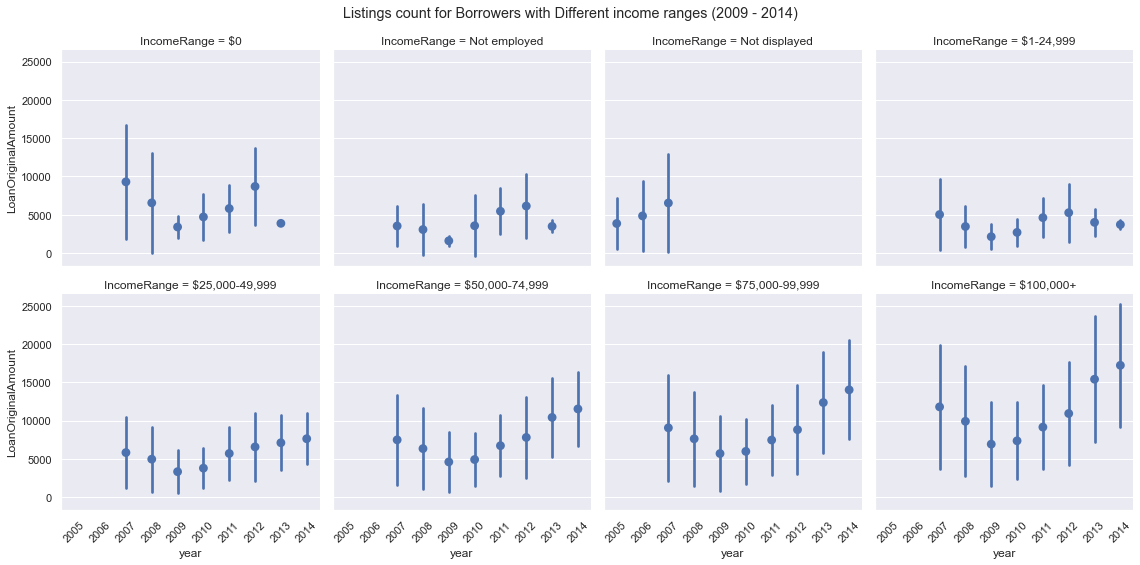

In [197]:
sb.set()
# the year order was created to supress a warning by the seaborn package. 
year_order = np.sort(df.year.unique())

# Creating the faceting over income range as a column
g= sb.FacetGrid(data=df, col= 'IncomeRange', col_wrap=4, height=4)
g.map(sb.pointplot, 'year', 'LoanOriginalAmount',  ci='sd', order=year_order, linestyles="")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Listings count for Borrowers with Different income ranges (2009 - 2014)')
plt.tight_layout();

* The year on year change in the loan amount distribution for the zero income borrowers declined from 2007 to 2009 and started to rise again till year 2012 and completely collapsed in 2013 with no records in 2014 which indicates some form of change in the rules to grant loans to this category of borrowers from prosper or may be they were shifted to other lending institutions.


- The not employed borrowers category already had relatively low loan amounts with very narrow spreads across years with very tight loan amounts distribution in the lower range below \\$5,000 in year 2013 and no data in 2013 just like the zero income group.


* The not displayed group had an increasing loan amounts' spread across years from 2005 to 2007 and then completely disappeared with no records since then. May be this group was completely removed as an option to grant loans forcing borrowers into more transparency about their income levels. One more note, this group is the only that showed data through the years 2005 and 2006 which indicates a change in categorization of income ranges that took place later starting from some point in 2007.


* \\$1-24,999 group also shows some falctuation with realtively low loan amounts from 2007 to 2012 and severley deminished in 2013 and 2014. This may be attributed to some change in the targeted segments by Prosper in recent years excluding low income groups of borrowers.


* The Rest of the groups showed wider spread of loan amounts since 2010 especially the \\$100,000+ group with consistently rising medians and maximums of the loan amounts. That supports my view that Prosper is targeting higher income borrowers recently may be to take the risk of defaulting down.

### 2. Trend of the Original Loan Amount per State

Here the trend of each state with respect to loan amount can be examined and seen in comparison with others.
Except for Lowa, Maine, North Dakota and south Dakota, the other states exhibited very similar ternds of the overall Original Loan Amount across years with varying totals from state to another.

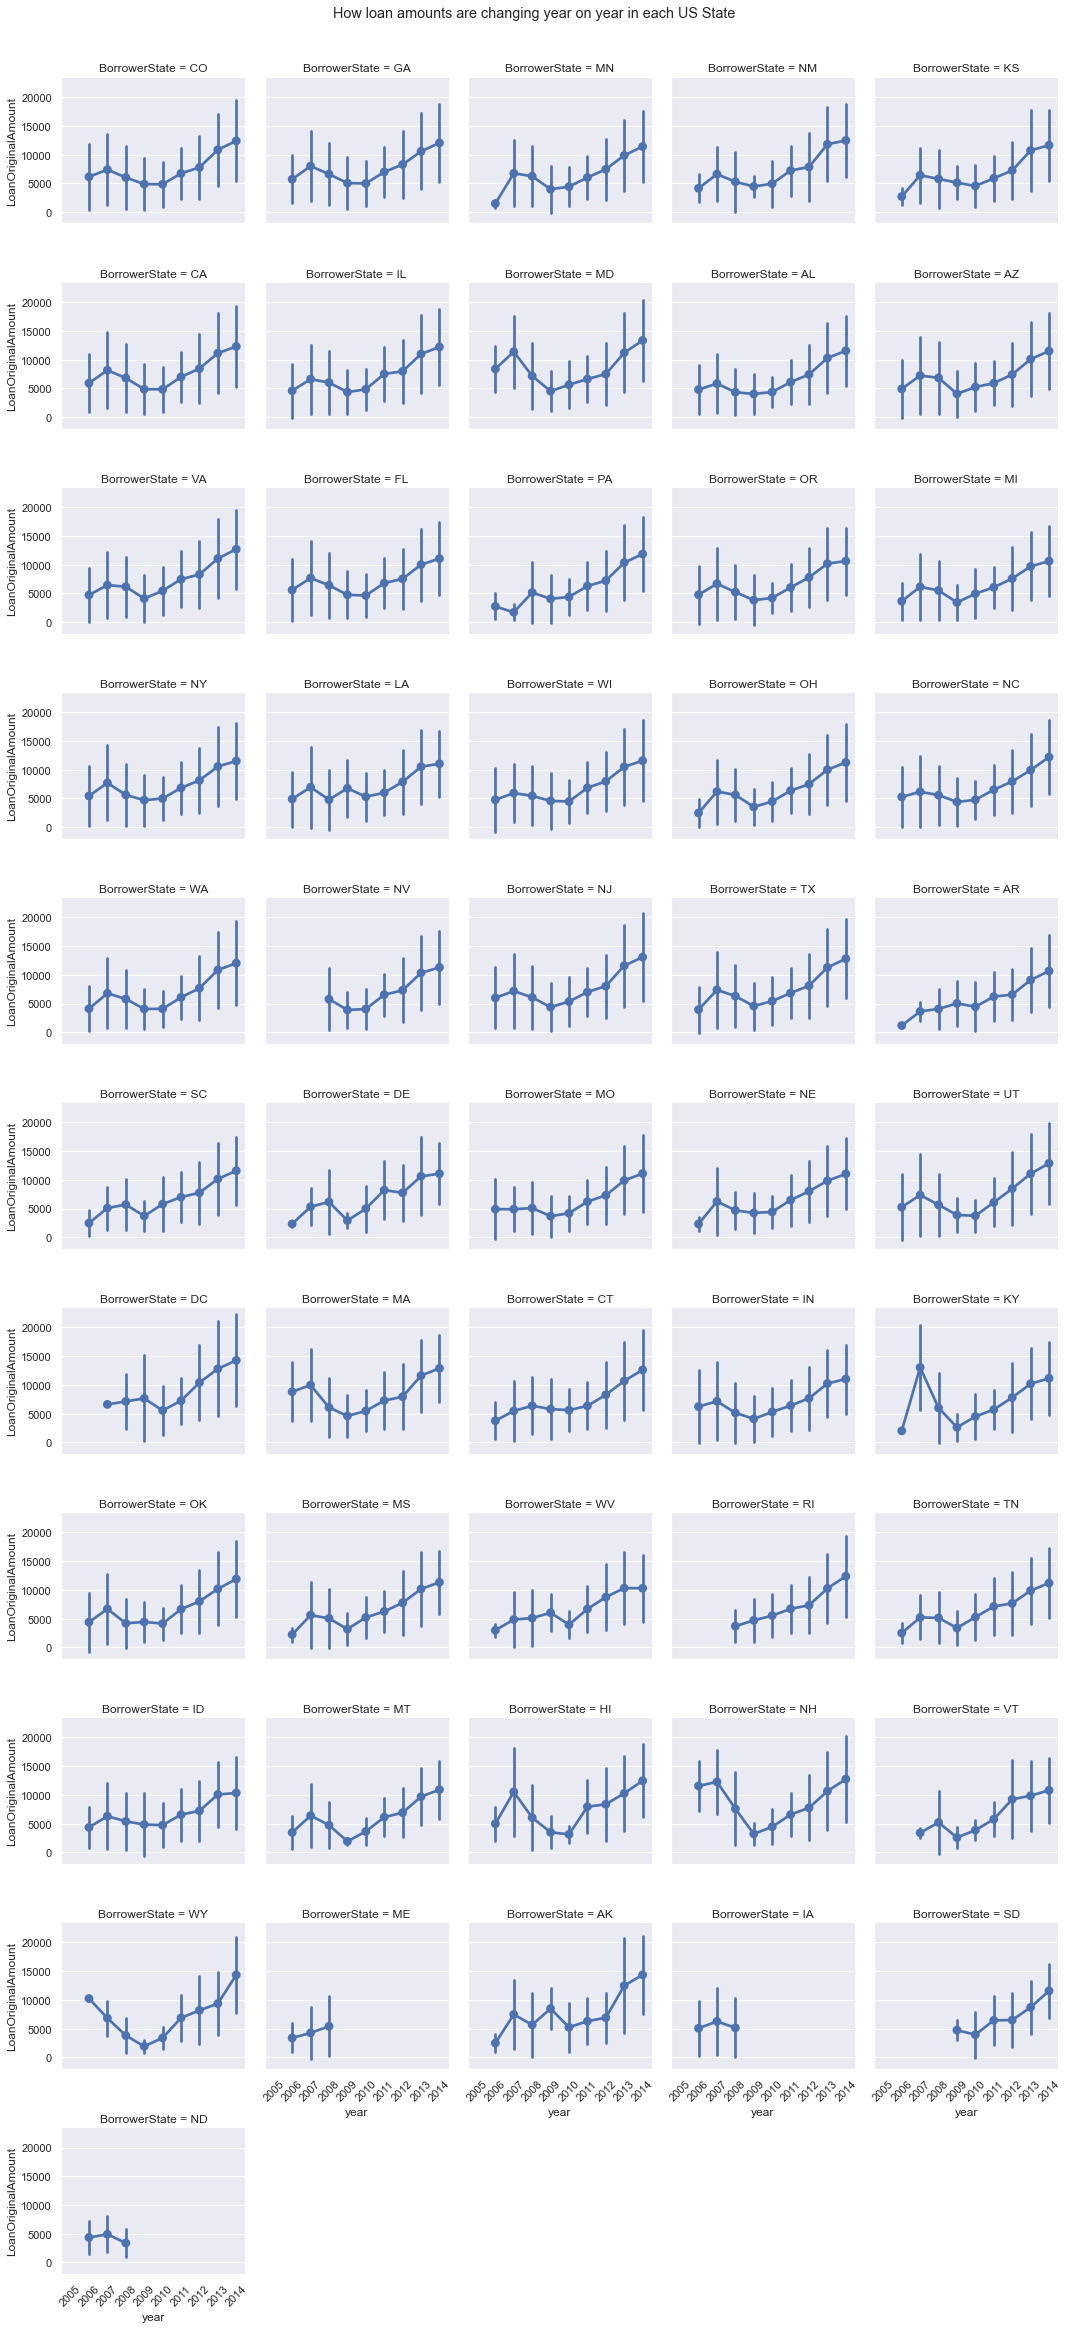

In [198]:
sb.set()
g=sb.FacetGrid(data=df, col='BorrowerState', col_wrap=5)
g.map(sb.pointplot, 'year','LoanOriginalAmount', ci='sd', order=year_order)
g.set_xticklabels(rotation=45)
g.fig.suptitle('How loan amounts are changing year on year in each US State')
plt.tight_layout()
g.fig.subplots_adjust(top=0.95);

#### References:
* https://stackoverflow.com/questions/59213176/how-to-reposition-title-in-seaborn-facetgrid-if-tight-layout-is-applied
* https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
* https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

### 3. Total number of listings partitioned by delinquency (loan status) over Time
Now we can examine how the year in which the listing was created impacted its likelihood of going delinquent or defaulted on one hand or being good standing on the other hand.

#### Option 1

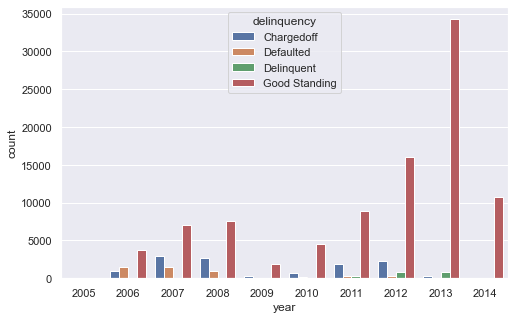

In [200]:
plt.figure(figsize=(8,5))
sb.countplot(data=df, x='year', hue='delinquency');

#### Option 2
Stacked bar plots

In [199]:
# create a dataframe to make a stacked bar plot
year_df = df.groupby([df.ListingCreationDate.dt.year, df.delinquency]).size().reset_index().rename(columns={'ListingCreationDate' : 'year', 0 :'count'})
year_df.head(10)

,year,delinquency,count
0,2005,Chargedoff,0
1,2005,Defaulted,0
2,2005,Delinquent,0
3,2005,Good Standing,23
4,2006,Chargedoff,1018
5,2006,Defaulted,1440
6,2006,Delinquent,0
7,2006,Good Standing,3751
8,2007,Chargedoff,2956
9,2007,Defaulted,1560


In [201]:
year_pivoted = year_df.pivot(index='year', columns='delinquency', values='count')
year_pivoted

delinquency,Chargedoff,Defaulted,Delinquent,Good Standing
year,,,,
2005,0,0,0,23
2006,1018,1440,0,3751
2007,2956,1560,0,7041
2008,2680,1012,0,7570
2009,255,81,0,1870
2010,737,186,11,4596
2011,1827,357,301,8957
2012,2239,345,888,16084
2013,280,37,856,34240


In [204]:
cat1_order = list(year_pivoted.index)
cat2_order = ['Good Standing', 'Delinquent', 'Defaulted', 'Chargedoff']

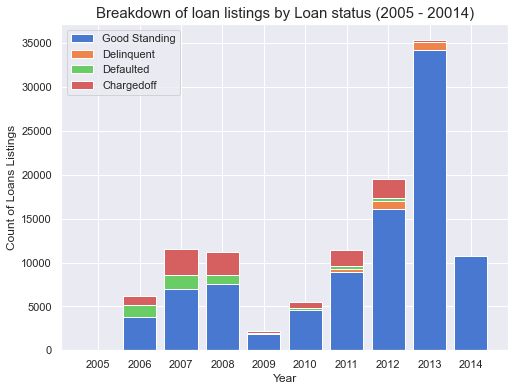

In [207]:
plt.figure(figsize=(8,6))


baselines = np.zeros(len(cat1_order))
# for each second-variable category:

for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = year_pivoted.index, height = year_pivoted[cat2], bottom = baselines, color=sb.color_palette('muted')[i])
    baselines += year_pivoted[cat2]

plt.xticks(year_pivoted.index, year_pivoted.index)
plt.xlabel('Year')
plt.ylabel('Count of Loans Listings')
plt.legend(cat2_order)
plt.title('Breakdown of loan listings by Loan status (2005 - 20014)', fontdict={'fontsize':15});

As illustrated in the delinquency breakup by year, its quiet conspicuous that the **chargedoff** and **dafaulted** loans were the highest in **2007** and **2008**.

Then, in 2009 the overall listings plummeted, most likely as a result of the financial crisis hit in late 2008, these observations highlight a **lead up to the financial crisis** by the soaring proportion of loans either went defaulted or chargedoff in some point in time in 2007 and 2008. 

Following that period, a gradual increase in the number of listings concomitently with a notable decline in the chargedoff and defaulted loans propotions prevailed the subsequent years to early 2014.

In [208]:
year_df.head()

,year,delinquency,count
0,2005,Chargedoff,0
1,2005,Defaulted,0
2,2005,Delinquent,0
3,2005,Good Standing,23
4,2006,Chargedoff,1018


#### Option 3

Let's see how the chargedoff and defaulted loans was soaring in 2007 and 2008

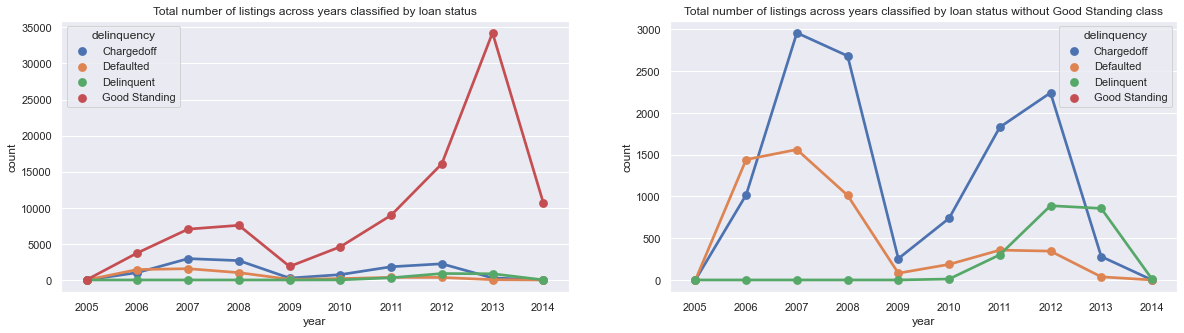

In [209]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sb.pointplot(data=year_df, x='year', y='count', hue='delinquency')
plt.title('Total number of listings across years classified by loan status');

plt.subplot(1,2,2)
sb.pointplot(data=year_df[year_df.delinquency != 'Good Standing'], x='year', y='count', hue='delinquency')
plt.title('Total number of listings across years classified by loan status without Good Standing class');

### 4. Plotting the Estimated loss vs BorrowerRate vs Lender Yield with ProsperRatings:

Estimated Loss **"which is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009"** - Show some discreteness in the values as we can see in the hued kernel density estimate by Prosper ratings, we can spot that listings has an estimated loss of 0-0.04 in case of AA (blue area) and A (orange area) prosper ratings. Then the estimated loss for credit ratings B (green area) and C (red area) take up the range from 0.04 - 0.1. Then ratings of D (purple area) and E (brown area) from 0.1 to 0.15. And finally the HR ratings (Pink area) take up the rest of estimated loss with some common values around 0.17, 0.25 and 0.35 

This discreteness are also shown in the scatter plots of estimated loss vs Borrower rate with a clear postive relationship between them as mentioned before in the bivariate section. The color hue is almost not overlaping and proceeding grudally from low values of borrower rate and estimated loss with credit rating of AA then A etc as the values go up in both variables. 

The lender yield which has an near perfect linear positive relationship with borrower rate, exhibits similar pattern against the estimated loss variable as that of the borrower rate discussed earlier.  

Adding the Prosper rating as a color aesthetic illuminates that the loans for borrowers with high ratings "AA" are usually granted lower borrowing rate and accompained by low estimated loss but yields low lender yields which is commensurate with the logic of safe investments. 

On the otherhand, The higher the borrowing rate elevates the estimated loss and usually granted to borrowers with low prosper ratings "HR".

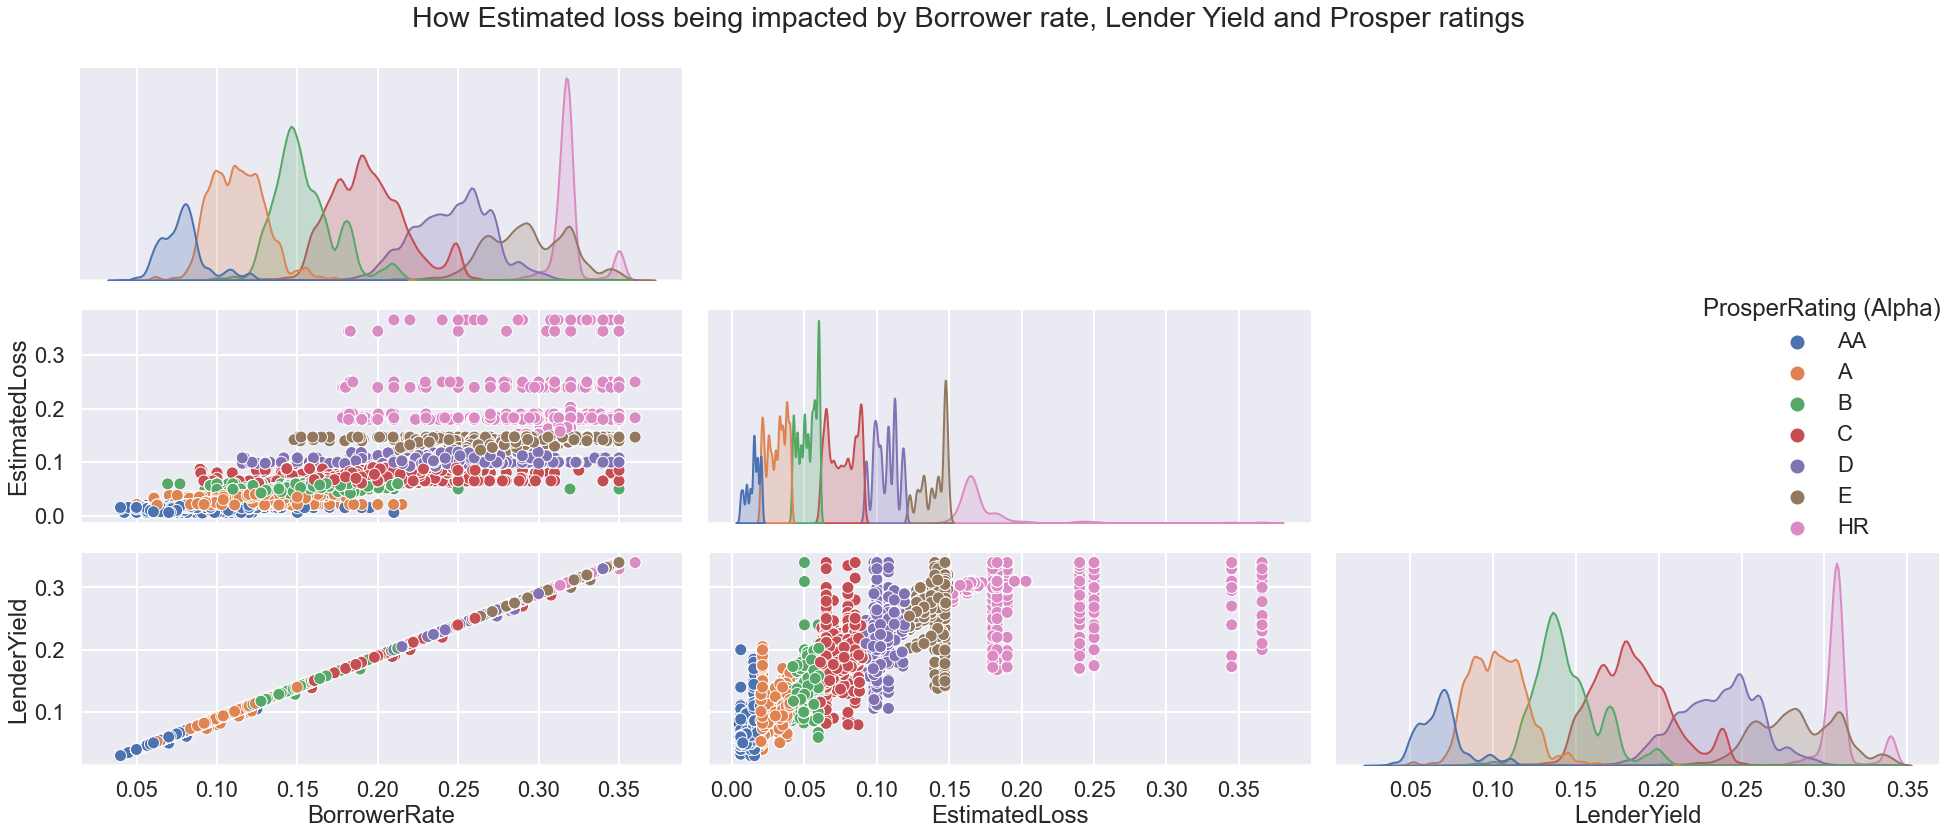

In [210]:
sb.set_context('poster')
df_sb = df[['BorrowerRate', 'EstimatedLoss', 'LenderYield', 'ProsperRating (Alpha)']]

g = sb.pairplot(df_sb, corner=True, height=4, aspect=2, hue='ProsperRating (Alpha)')
g.fig.suptitle('How Estimated loss being impacted by Borrower rate, Lender Yield and Prosper ratings ')
plt.subplots_adjust(top=0.95)
plt.tight_layout();

**Resources:** https://stackoverflow.com/a/53898825/9730632

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. In the first plot `Listings count for Borrowers with Different income ranges (2009 - 2014)`, the variation of loan amounts within different income ranges within each year showed us a change in the borrowers granted loans by Prosper and how thay shifted their targeting criteria and redefined the income range in a way that’s more transparent and achieves lower risks.


2. The Second facetgrid (`'How loan amounts are changing year on year in each US State'`) shows the performance of Prosper within each state across the dataset span of time by reflecting the growth and decline of the original loan amounts granted per year and revealed some states with unconventional amounts across years like Lowa, Maine, North Dakota and south Dakota


3. In the third illustration, the loan listings breakup by years and  loan status, there was an observation that might be realted to the financial crisis hit in late 2008, these observations highlight a lead up to the financial crisis by the soaring proportion of loans either went defaulted or chargedoff in some point in time in 2007 and 2008. Following that period, a gradual increase in the number of listings concomitently with a notable decline in the chargedoff and defaulted loans propotions prevailed the subsequent years to early 2014.

4. The fourth faceted scatter plots illustrates a potential association between the Estimated loss and each of the Borrower Rate, the Prosper Rating and the Lender Yield. It shows this association through the use of a comination of graphing aesthetics like color and faceting.

### Were there any interesting or surprising interactions between features?

> The first, third and the fourth graphs shows really interesting association between variables of interest.